# 0. Imports and Useful Functions from Other Notebooks

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set()
df = pd.read_pickle('female_test.pkl')

import os
import pickle
from glob import glob
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde

In [6]:
def scatter_plot_heatmap(x, y, xlabel, ylabel, title, equality_line=True, set_scale=False):
    
    if isinstance(x, pd.Series):
        x = x.to_numpy()
    
    if isinstance(y, pd.Series):
        y = y.to_numpy()
    
    fig = plt.figure(figsize=[7.2, 7.2])
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z,s=50)
    if equality_line == True:
        plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
    
    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    
    pearson_correlation = pearsonr(x,y)[0]
    
    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        plt.xlim([c_min-2, c_max+2])
        plt.ylim([c_min-2, c_max+2])
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    lbl = 'Pearson R = '+str(round(pearson_correlation,3))
    plt.plot([],[],' ',label=lbl)
    
    plt.title(title)
    plt.legend()
    plt.show()
    
def kde_plot(x, y, xlabel, ylabel, title):
    plt.figure()
    sns.kdeplot(x, label='Ground Truth')
    sns.kdeplot(y, label= ylabel)
    plt.legend()
    plt.title(title)
    
def age_deconfounding(predicted_ages, chronological_ages):
    
    if isinstance(predicted_ages, pd.Series):
        predicted_ages = predicted_ages.to_numpy()
    
    if isinstance(chronological_ages, pd.Series):
        chronological_ages = chronological_ages.to_numpy()
    
    ones = np.ones(len(chronological_ages))
    chronological_ages_squared = np.square(chronological_ages)
    chronological_ages_confounds = np.array([ones, chronological_ages])
    
    ones_predicted = np.ones(len(predicted_ages))
    predicted_ages_squared = np.square(predicted_ages)
    predicted_ages_confounds = np.array([ones_predicted, predicted_ages])
    
    predicted_ages = np.reshape(predicted_ages, (len(predicted_ages), 1) )
    beta = np.dot( np.linalg.pinv(chronological_ages_confounds.T), predicted_ages )

    corrected_predicted_ages = (predicted_ages.flatten() - beta[0])/beta[1]
    
    return corrected_predicted_ages

In [7]:
df

,modality,dataframe
0,T1_nonlinear,Unnamed: 0 target_age output_age_1 ag...
1,T1_linear,Unnamed: 0 target_age output_age_1 ag...
2,jacobian,Unnamed: 0 target_age output_age_1 ag...
3,vbm,Unnamed: 0 target_age output_age_1 ag...
4,T2_nonlinear,Unnamed: 0 target_age output_age_1 ag...
5,T2_lesions,Unnamed: 0 target_age output_age_1 ag...
6,swi,Unnamed: 0 target_age output_age_1 ag...
7,rsfmri_0,Unnamed: 0 target_age output_age_1 ag...
8,rsfmri_1,Unnamed: 0 target_age output_age_1 ag...
9,rsfmri_2,Unnamed: 0 target_age output_age_1 ag...


In [8]:
df.iloc[0].dataframe.head()

,Unnamed: 0,target_age,output_age_1,age_delta_1,loss_1,output_age_2,age_delta_2,loss_2,output_age_3,age_delta_3,loss_3,mean_output_age,mean_age_delta,output_age_decon,age_delta_decon
0,24806531,67.670662,64.333970,-3.336693,11.133520,68.213356,0.542694,0.294517,69.064550,1.393890,1.942930,67.203959,-0.466703,67.759970,0.089308
1,24237795,77.280936,76.549820,-0.731116,0.534531,80.026930,2.745996,7.540492,73.370640,-3.910292,15.290387,76.649130,-0.631806,78.834010,1.553074
2,24748274,58.301941,58.474884,0.172943,0.029909,57.800220,-0.501720,0.251723,58.086678,-0.215263,0.046338,58.120594,-0.181347,57.110133,-1.191808
3,25463415,58.056694,61.464960,3.408264,11.616265,61.611057,3.554363,12.633498,59.947334,1.890640,3.574521,61.007784,2.951090,60.495233,2.438539
4,25313661,59.653082,60.595932,0.942850,0.888966,60.810764,1.157682,1.340228,60.452370,0.799287,0.638861,60.619689,0.966606,60.040209,0.387127


In [9]:
modalities = df.modality.to_list()
subjects = df.iloc[0].dataframe['Unnamed: 0'].to_list()

# 1. Ensamble Top-5 Modalities

In [10]:
custom_modalities = ['T1_nonlinear', 'rsfmri_0', 'tfmri_1', 'tracts', 'tbss_FA']

In [11]:
def naive_ensambling(df, custom_modalities=None, min_objects=None, max_objects=None, verbose=True):
    
    ensamble_names = []
    ensambled_dfs = []
    mae_improvements = []
    min_single_maes = []
    ensambled_maes = []
    
    if verbose:
        print("{:13} : {:6}  |  {:5} ".format('Modality', 'MAE', "PR"))
        print('-----------------------------------------------------------------------------------------------')
    
    
    modalities = df.modality.to_list()
    subjects = df.iloc[0].dataframe['Unnamed: 0'].to_list()
    
    if custom_modalities == None:
        custom_modalities = modalities
    
    objects = len(custom_modalities)
    
    if min_objects == None:
        min_objects = 2
    
    if max_objects == None:
        max_objects = objects+1
    else:
        max_objects = max_objects+1
    
    for sample in range(min_objects, max_objects):
        for subset in itertools.combinations(custom_modalities, sample):
            subset = list(subset)

            ensambled_ages_deconfounded = 0
            component_age_delta_decon_mean = []

            for modality in subset:

                ensambled_ages_deconfounded += df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy()
                component_age_delta_decon_mean.append(np.abs(df.iloc[modalities.index(modality)].dataframe.age_delta_decon).mean())

            ensambled_ages_deconfounded = np.divide(ensambled_ages_deconfounded, sample)
            ensambled_deltas_deconfounded = np.subtract(
                ensambled_ages_deconfounded,
                df.iloc[modalities.index(modality)].dataframe.target_age.to_numpy()    
            )

            if (np.abs(ensambled_deltas_deconfounded).mean() < np.array(component_age_delta_decon_mean)).all():
                
                if verbose:
                    print(subset)
                
                name = ''
                dct = {}
                
                for modality in subset:
                    if verbose:
                        print('{:13} :  {:.3f}  |  {:.3f}'.format(
                            modality, 
                            np.abs(df.iloc[modalities.index(modality)].dataframe.age_delta_decon).mean(),
                            pearsonr(df.iloc[modalities.index(modality)].dataframe.target_age, df.iloc[modalities.index(modality)].dataframe.output_age_decon)[0]))
                    if name == '':
                        name = modality
                    else:
                        name += ' '
                        name += modality
                if verbose:
                    print('{:13} :  {:.3f}  |  {:.3f}'.format(
                        'Ensamble', 
                        np.abs(ensambled_deltas_deconfounded).mean(),
                        pearsonr(df.iloc[modalities.index(modality)].dataframe.target_age, ensambled_ages_deconfounded)[0]
                    ))

                ensamble_names.append(name)
                dct['Unnamed: 0'] = subjects
                dct['target_age'] = df.iloc[modalities.index(modality)].dataframe.target_age.to_list()
                dct['output_age_decon'] = ensambled_ages_deconfounded
                dct['age_delta_decon'] = ensambled_deltas_deconfounded
                dct = pd.DataFrame.from_dict(dct)
                ensambled_dfs.append(dct)
                
                mae_improvement = min(np.array(component_age_delta_decon_mean)) - np.abs(ensambled_deltas_deconfounded).mean()
                mae_improvements.append(mae_improvement)
                
                min_single_mae = min(np.array(component_age_delta_decon_mean))
                min_single_maes.append(min_single_mae)
                ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
                ensambled_maes.append(ensambled_mae)
                
                if verbose:
                    print('------------------------------------------------------------')
                
    ensamble_dct = {'modality': ensamble_names, 'dataframe': ensambled_dfs, 
                    'min_single_mae': min_single_maes, 'ensambled_mae': ensambled_maes,
                    'mae_improvement': mae_improvements}
    ensamble_dct = pd.DataFrame.from_dict(ensamble_dct)
    
    return ensamble_dct
                

In [8]:
ensamble_df = naive_ensambling(df, custom_modalities=None, min_objects=57, max_objects=57, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------


In [9]:
ensamble_df = naive_ensambling(df, custom_modalities=custom_modalities, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------
['T1_nonlinear', 'tbss_FA']
T1_nonlinear  :  2.429  |  0.924
tbss_FA       :  2.997  |  0.887
Ensamble      :  2.378  |  0.926
------------------------------------------------------------
['tfmri_1', 'tracts']
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |  0.848
Ensamble      :  3.293  |  0.870
------------------------------------------------------------
['tracts', 'tbss_FA']
tracts        :  3.614  |  0.848
tbss_FA       :  2.997  |  0.887
Ensamble      :  2.937  |  0.892
------------------------------------------------------------
['rsfmri_0', 'tfmri_1', 'tracts']
rsfmri_0      :  5.711  |  0.712
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |  0.848
Ensamble      :  3.574  |  0.850
------------------------------------------------------------
['tfmri_1', 'tracts', 'tbss_FA']
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |

In [10]:
ensamble_df.iloc[0].dataframe.head()

,Unnamed: 0,target_age,output_age_decon,age_delta_decon
0,24806531,67.670662,70.353856,2.683194
1,24237795,77.280936,81.468994,4.188058
2,24748274,58.301941,58.123367,-0.178574
3,25463415,58.056694,59.189741,1.133047
4,25313661,59.653082,56.846480,-2.806602


In [11]:
ensamble_df

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear tbss_FA,Unnamed: 0 target_age output_age_decon...,2.429401,2.378261,0.051140
1,tfmri_1 tracts,Unnamed: 0 target_age output_age_decon...,3.613669,3.293443,0.320227
2,tracts tbss_FA,Unnamed: 0 target_age output_age_decon...,2.997317,2.936872,0.060445
3,rsfmri_0 tfmri_1 tracts,Unnamed: 0 target_age output_age_decon...,3.613669,3.574387,0.039282
4,tfmri_1 tracts tbss_FA,Unnamed: 0 target_age output_age_decon...,2.997317,2.916370,0.080947


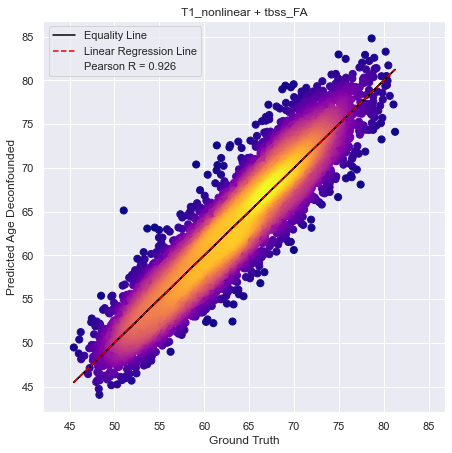

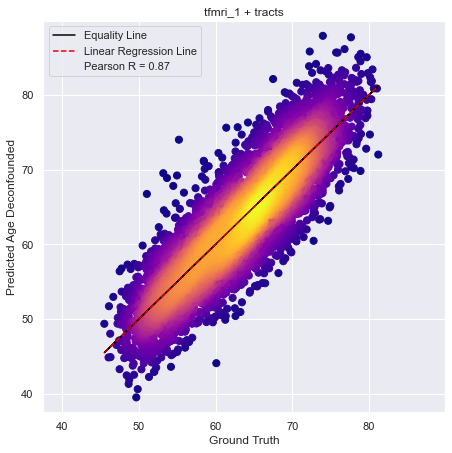

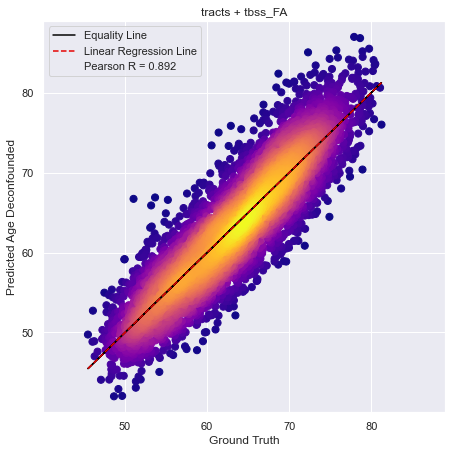

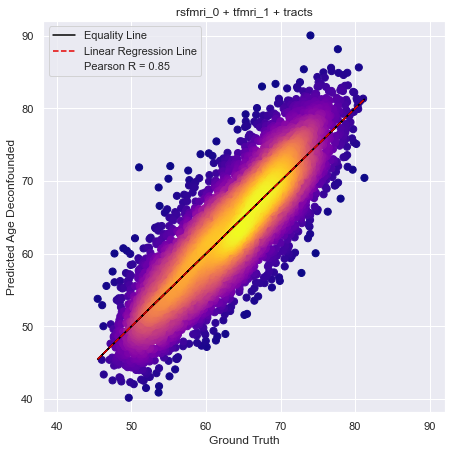

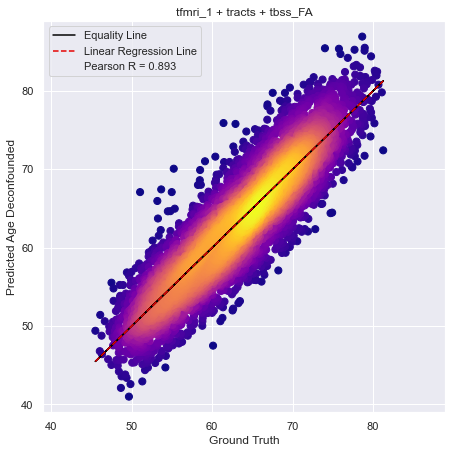

In [12]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = scatter_plot_heatmap(x=df_mod.target_age, y=df_mod.output_age_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Deconfounded', title=name_ens, set_scale=True)

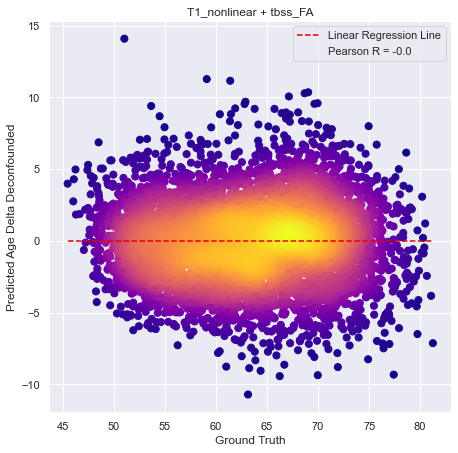

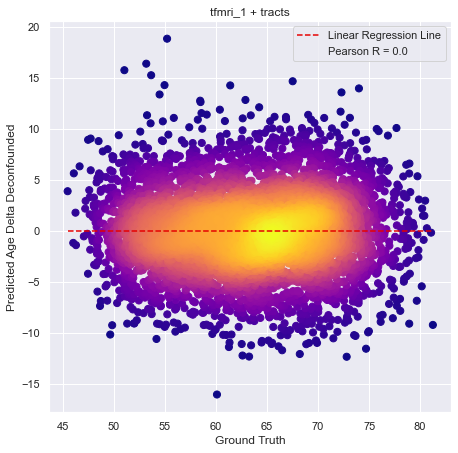

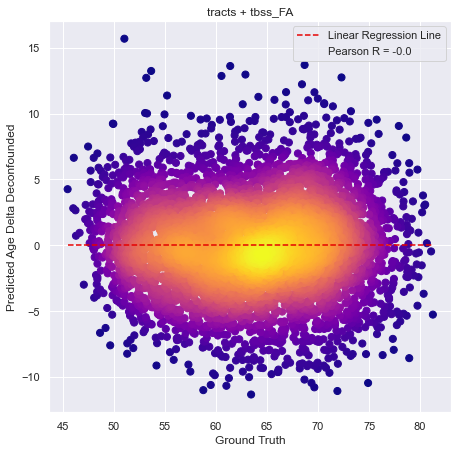

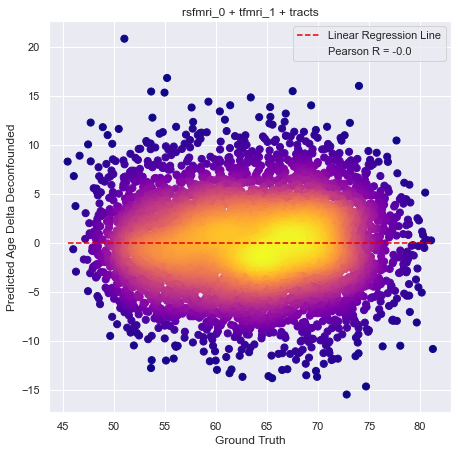

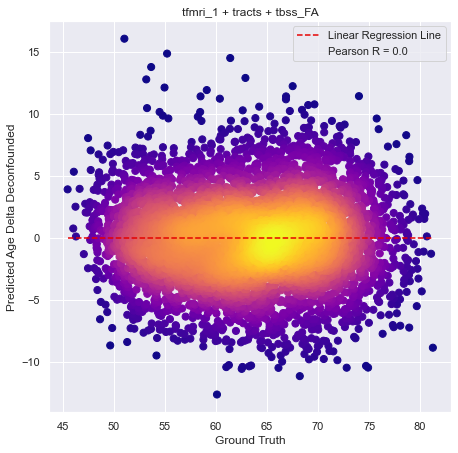

In [13]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = scatter_plot_heatmap(x=df_mod.target_age, y=df_mod.age_delta_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=name_ens, set_scale=False, 
                               equality_line=False)

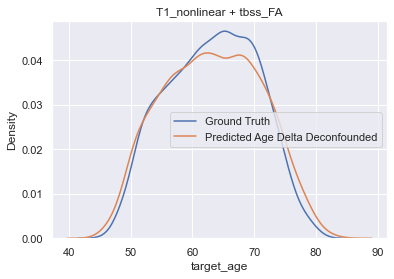

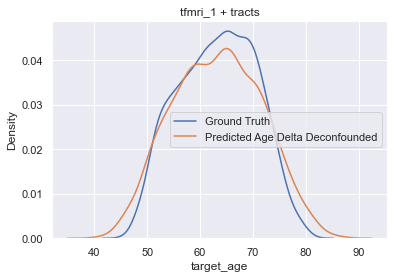

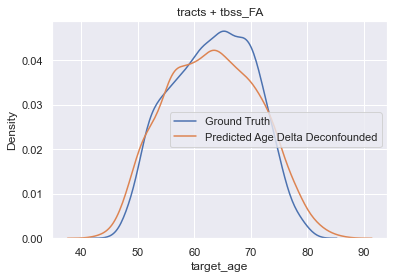

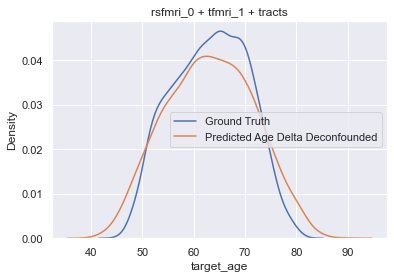

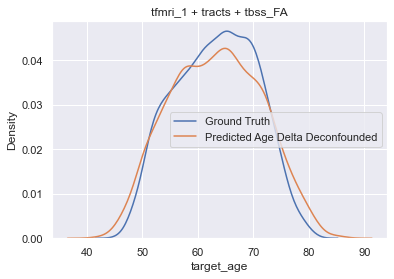

In [14]:
for idx in range(len(ensamble_df)):
    df_mod = ensamble_df.iloc[idx].dataframe
    name_mod = ensamble_df.iloc[idx].modality.split()
    name_ens = ''
    for name in name_mod:
        if name_ens == '':
            name_ens = name
        else:
            name_ens += ' + ' + name
    fig = kde_plot(x=df_mod.target_age, y=df_mod.output_age_decon, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title=name_ens)

----
### NOTES 1:
----

When ensambling various combinations of modalities, the overall MAE does not always go down. In fact, it can generally be observed going down for:
- the cases where sMRI and dMRI modalities are combined
- the cases where rsfMRI or tMRI are combined with the above

When comparing the various plots for the ensambles, no significant changes appear to occur vs. the cases where we are just working with individual modalities. 

----

# 2. Rank Modalities By MAE & Correlations

In [15]:
modality_decon_maes = []

for idx in range(len(df)):
    modality_decon_mae = np.abs(df.iloc[idx].dataframe.age_delta_decon).mean()
    modality_decon_maes.append(modality_decon_mae)
    
mae_df = pd.DataFrame.from_dict({
    'modality': df.modality.to_list(),
    'mae_decon': modality_decon_maes
})


In [16]:
mae_df.sort_values('mae_decon')

,modality,mae_decon
4,T2_nonlinear,2.372138
0,T1_nonlinear,2.429401
1,T1_linear,2.549765
3,vbm,2.925686
49,tbss_ICVF,2.951742
48,tbss_FA,2.997317
50,tbss_ISOVF,3.143075
56,tbss_OD,3.165894
52,tbss_L2,3.201913
51,tbss_L1,3.217686


In [17]:
custom_modalities_2 = ['T2_nonlinear', 'rsfmri_0', 'tfmri_1', 'tracts', 'tbss_ICVF']
# custom_modalities_2 = ['T1_nonlinear', 'T2_nonlinear', 'swi', 'tracts', 'rsfmri_0', 'tfmri_1']
ensamble_df = naive_ensambling(df, custom_modalities=custom_modalities_2, verbose=True)

Modality      : MAE     |  PR    
-----------------------------------------------------------------------------------------------
['tfmri_1', 'tracts']
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |  0.848
Ensamble      :  3.293  |  0.870
------------------------------------------------------------
['tracts', 'tbss_ICVF']
tracts        :  3.614  |  0.848
tbss_ICVF     :  2.952  |  0.891
Ensamble      :  2.837  |  0.898
------------------------------------------------------------
['rsfmri_0', 'tfmri_1', 'tracts']
rsfmri_0      :  5.711  |  0.712
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |  0.848
Ensamble      :  3.574  |  0.850
------------------------------------------------------------
['tfmri_1', 'tracts', 'tbss_ICVF']
tfmri_1       :  4.249  |  0.807
tracts        :  3.614  |  0.848
tbss_ICVF     :  2.952  |  0.891
Ensamble      :  2.857  |  0.897
------------------------------------------------------------


----
### NOTES 2:
----

Vs. the case from Notes 1, here we selected for each "class" of modality those displaying the lowest MAE. Looking at the "Ensamble" performances, we can observe that these are generally smaller than for our best guess from above. This could suggest that simply picking modalities intuitivelly or by a given metric might not be the most adequate way of approaching this problem. 

----

In [11]:
modalities = df.modality.to_list()
corr_output_age_decons = []
corr_age_delta_decons = []
ensamble_names = []
min_maes = []
ensambled_maes = []

for subset in itertools.combinations(modalities, 2):
    subset = list(subset)
    ensamble_name = subset[0] + ' ' + subset[1]
    ensamble_names.append(ensamble_name)
    
    corr_output_age_decon = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.output_age_decon)[0]
    corr_output_age_decons.append(corr_output_age_decon)
    
    corr_age_delta_decon = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon)[0]
    corr_age_delta_decons.append(corr_age_delta_decon)
    
    min_mae = min(
                    np.abs(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon).mean()
    )
    min_maes.append(min_mae)
    
    ensambled_ages_deconfounded = (df.iloc[modalities.index(subset[0])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[1])].dataframe.output_age_decon.to_numpy()) / 2
    
    ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[modalities.index(subset[0])].dataframe.target_age.to_numpy()    
    )
    
    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    ensambled_maes.append(ensambled_mae)
    
    
    
pr_df = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'corr_output_age_decon': corr_output_age_decons,
    'corr_age_delta_decon' : corr_age_delta_decons,
    'min_mae': min_maes,
    'ensambled_mae': ensambled_maes,
})

pr_df['mae_improvements'] = pr_df['min_mae'] - pr_df['ensambled_mae']


In [12]:
pr_df

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear,0.961933,0.754546,2.429401,2.335299,0.094102
1,T1_nonlinear jacobian,0.868472,0.496385,2.429401,2.804948,-0.375547
2,T1_nonlinear vbm,0.936048,0.644710,2.429401,2.434599,-0.005198
3,T1_nonlinear T2_nonlinear,0.950530,0.660474,2.372138,2.187456,0.184682
4,T1_nonlinear T2_lesions,0.768171,0.363134,2.429401,3.394610,-0.965209
...,...,...,...,...,...,...
1591,tbss_L3 tbss_MO,0.896916,0.582417,3.267353,2.956021,0.311332
1592,tbss_L3 tbss_OD,0.928608,0.696106,3.165894,2.972614,0.193280
1593,tbss_MD tbss_MO,0.897566,0.584421,3.252166,2.950554,0.301613
1594,tbss_MD tbss_OD,0.929444,0.699117,3.165894,2.962054,0.203840


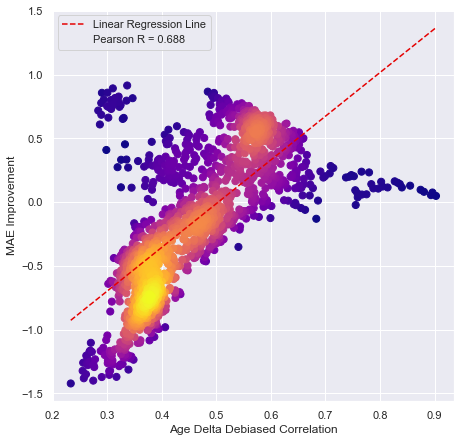

In [13]:
scatter_plot_heatmap(x=pr_df.corr_age_delta_decon, y=pr_df.mae_improvements, 
                     xlabel='Age Delta Debiased Correlation', 
                   ylabel='MAE Improvement', title=None, set_scale=False, 
                   equality_line=False)

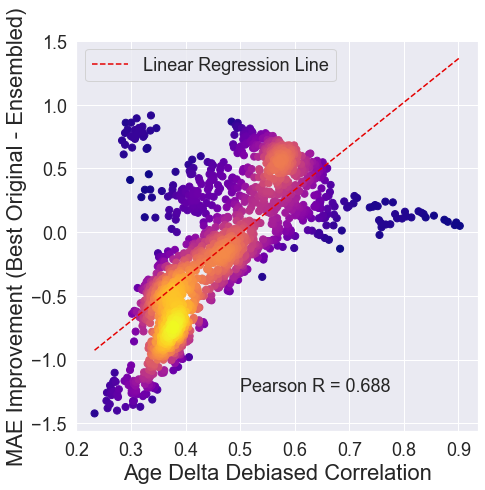

In [23]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(7.2, 7.2)

x=pr_df.corr_age_delta_decon
y=pr_df.mae_improvements
xlabel='Age Delta Debiased Correlation'
ylabel='MAE Improvement (Best Original - Ensembled)'
title=None
set_scale=False 
equality_line=False


if isinstance(x, pd.Series):
    x = x.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

fig = plt.figure(figsize=figsize)

sns.set_style("darkgrid", {'image.cmap': u'plasma'})
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x,y,c=z,s=50)
if equality_line == True:
    plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality

X_mat=np.vstack((np.ones(len(x)), x)).T
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
b,w = beta_hat[0],beta_hat[1]
x2 = np.linspace(np.min(x),np.max(x),num=10)
y2 = w * x2 + b
plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')

pearson_correlation = pearsonr(x,y)[0]
text_x = 0.5
text_y = -1.25
lbl = 'Pearson R = '+str(round(pearson_correlation,3))
plt.text(text_x, text_y, lbl, fontsize=legend_font)

if set_scale == True:
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    c_min, c_max = min(x_min, y_min), max(x_max, y_max)
    plt.xlim([c_min-2, c_max+2])
    plt.ylim([c_min-2, c_max+2])

plt.xlabel(xlabel, fontsize = title_font_size)
plt.ylabel(ylabel, fontsize = title_font_size)

plt.xticks(fontsize=ticks_font_size)
plt.yticks(fontsize=ticks_font_size)


# plt.plot([],[],' ',label=lbl)

plt.title(title, fontsize= title_font_size)
plt.legend(fontsize = legend_font)
plt.show()

fig.savefig('Female_Naive_ensembling_mae_improvement_vs_correlation.png', bbox_inches='tight', facecolor='white')


In [ ]:
def scatter_plot_heatmap_subplots(ax, x, y, xlabel, ylabel, title, equality_line=True, set_scale=False,
                                 set_y_scale=None, set_hard_scale=None, 
                                  title_font_size=15, x_axis_off_flag=False, y_axis_off_flag=False,
                                  ticks_font_size=12,
                                  plot_legend_flag = True, legend_font = 12, plot_full_legend=True,
                                  text_x=40, text_y=40,
                                 ):
    
    x = x.to_numpy()
    y = y.to_numpy()
    
    sns.set_style("darkgrid", {'image.cmap': u'plasma'})
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    srt = z.argsort()
    x, y, z = x[srt], y[srt], z[srt]
    ax.scatter(x,y,c=z,s=50)
    if equality_line == True:
        if plot_full_legend==True:
            ax.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality
        else:
            ax.plot(x, x, ls="-", color = sns.xkcd_rgb['black']) #this is just the line of equality


    X_mat=np.vstack((np.ones(len(x)), x)).T
    beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
    b,w = beta_hat[0],beta_hat[1]
    x2 = np.linspace(np.min(x),np.max(x),num=10)
    y2 = w * x2 + b
    if plot_full_legend==True:
        ax.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')
    else:
        ax.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'])
    
    pearson_correlation = pearsonr(x,y)[0]
    
    if set_scale == True:
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        c_min, c_max = min(x_min, y_min), max(x_max, y_max)
        ax.set_xlim([c_min-2, c_max+2])
        ax.set_ylim([c_min-2, c_max+2])
        
    if set_y_scale != None:
        ax.set_ylim([-set_y_scale-2, set_y_scale+2])
        
    if set_hard_scale!=None:
        ax.set_xlim([set_hard_scale[0]-2, set_hard_scale[1]+2])
        ax.set_ylim([set_hard_scale[2]-2, set_hard_scale[3]+2])
    
    ax.set_xlabel(xlabel,  fontsize=title_font_size)
    ax.set_ylabel(ylabel,  fontsize=title_font_size)
    
    ax.tick_params(axis='x', labelsize= ticks_font_size)
    ax.tick_params(axis='y', labelsize= ticks_font_size)
    
    lbl = 'Pearson R = '+str(round(pearson_correlation,3))
#     ax.plot([],[],' ',label=lbl)
    ax.text(text_x, text_y, lbl, fontsize=legend_font)
    
    ax.set_title(title, fontsize=title_font_size)
    if plot_legend_flag == True:
        ax.legend(fontsize=legend_font, loc=2)
    
    if x_axis_off_flag == True:
        ax.axes.xaxis.set_ticklabels([])
    if y_axis_off_flag == True:
        ax.axes.yaxis.set_ticklabels([])

In [21]:
pr_df[pr_df.mae_improvements >= 0.75].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
271,T2_lesions rsfmri_0,0.680804,0.336732,5.509517,4.593735,0.915782
293,T2_lesions rsfmri_22,0.661799,0.310507,5.509517,4.616338,0.893179
278,T2_lesions rsfmri_7,0.653429,0.300571,5.509517,4.649968,0.859548
292,T2_lesions rsfmri_21,0.649273,0.290464,5.509517,4.651219,0.858298
288,T2_lesions rsfmri_17,0.665647,0.321102,5.509517,4.680585,0.828932
272,T2_lesions rsfmri_1,0.658124,0.314514,5.509517,4.691917,0.817600
282,T2_lesions rsfmri_11,0.679880,0.346699,5.509517,4.693426,0.816091
283,T2_lesions rsfmri_12,0.646010,0.294016,5.509517,4.703630,0.805886
284,T2_lesions rsfmri_13,0.653012,0.306898,5.509517,4.708305,0.801212
289,T2_lesions rsfmri_18,0.671875,0.335511,5.509517,4.712568,0.796948


In [22]:
pr_df[pr_df.mae_improvements >= 0.0]

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear,0.961933,0.754546,2.429401,2.335299,0.094102
3,T1_nonlinear T2_nonlinear,0.950530,0.660474,2.372138,2.187456,0.184682
47,T1_nonlinear tbss_FA,0.911519,0.519984,2.429401,2.378261,0.051140
48,T1_nonlinear tbss_ICVF,0.916346,0.537300,2.429401,2.357500,0.071901
57,T1_linear vbm,0.936730,0.658070,2.549765,2.496324,0.053441
...,...,...,...,...,...,...
1591,tbss_L3 tbss_MO,0.896916,0.582417,3.267353,2.956021,0.311332
1592,tbss_L3 tbss_OD,0.928608,0.696106,3.165894,2.972614,0.193280
1593,tbss_MD tbss_MO,0.897566,0.584421,3.252166,2.950554,0.301613
1594,tbss_MD tbss_OD,0.929444,0.699117,3.165894,2.962054,0.203840


In [23]:
pr_df[(pr_df.mae_improvements >= -1) & (pr_df.mae_improvements <= -0.5)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
250,T2_nonlinear tfmri_c_5,0.826683,0.385904,2.372138,2.877682,-0.505544
247,T2_nonlinear tfmri_5,0.818076,0.390015,2.372138,2.972856,-0.600718
33,T1_nonlinear tfmri_5,0.825891,0.424086,2.429401,3.020728,-0.591327
88,T1_linear tfmri_5,0.830376,0.447635,2.549765,3.084832,-0.535067
4,T1_nonlinear T2_lesions,0.768171,0.363134,2.429401,3.394610,-0.965209
...,...,...,...,...,...,...
327,swi rsfmri_6,0.718301,0.390518,3.626025,4.313144,-0.687119
329,swi rsfmri_8,0.730129,0.413376,3.626025,4.315205,-0.689179
340,swi rsfmri_19,0.708463,0.378905,3.626025,4.352690,-0.726665
1145,rsfmri_19 tbss_ISOVF_s,0.700278,0.370305,3.956335,4.461417,-0.505082


----
### NOTES 3:
----

What I have done here is take all the possible combinations of 2 modalities that are possible and ensamble then. I wanted to test the hypothesis proposed by Han, which is that the MAE improvement is greater when the correlation between deltas is smaller. 

As it can be observed from the plot, this isn't necessarily the case. In fact, the smaller the correlations between the deltas, the smaller the improvement in MAE for combinations of 2 modalities. This can also lead to negative improvements, although this isn't necessarily an indication of a degradation in biological meaningfulness. 

2 distinct groups showing high improvements (> 0.5-0.75) for low and medium correlations can be observed. These can be traced back to the dataset as being
* ensambles of the T2_lessions with various rsfmri modalities, which have very low correlations ~0.3
* ensambles of the rsfMRI modalities, generally having correlations of about ~0.5-0.6 between themselves.

***TO CHECK: LOOK AT ENSAMBLING ELEMENTS FROM THE VARIOUS GROUPS, SUCH AS RSFMRI BETWEEN THEMSELVES (IE. HIGHLY CORRELATED DATA, AND THEN USE THOSE AS A "SEPARATE MODALITY"***


----

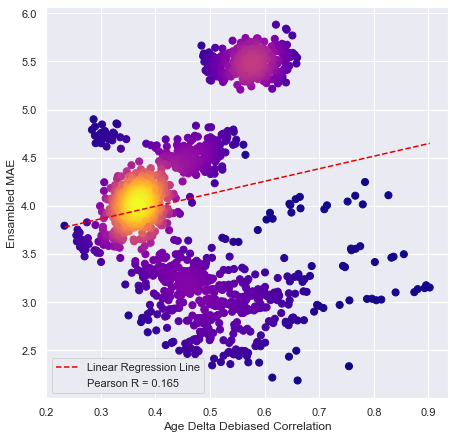

In [24]:
scatter_plot_heatmap(x=pr_df.corr_age_delta_decon, y=pr_df.ensambled_mae, 
                     xlabel='Age Delta Debiased Correlation', 
                   ylabel='Ensambled MAE', title=None, set_scale=False, 
                   equality_line=False)

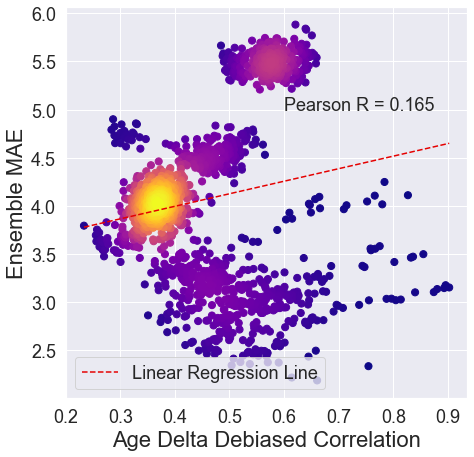

In [26]:
title_font_size=22
ticks_font_size=18
legend_font = 18
figsize=(7.2, 7.2)

x=pr_df.corr_age_delta_decon
y=pr_df.ensambled_mae
xlabel='Age Delta Debiased Correlation'
ylabel='Ensemble MAE'
title=None
set_scale=False 
equality_line=False


if isinstance(x, pd.Series):
    x = x.to_numpy()

if isinstance(y, pd.Series):
    y = y.to_numpy()

fig = plt.figure(figsize=figsize)

sns.set_style("darkgrid", {'image.cmap': u'plasma'})
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]
plt.scatter(x,y,c=z,s=50)
if equality_line == True:
    plt.plot(x, x, ls="-", color = sns.xkcd_rgb['black'], label='Equality Line') #this is just the line of equality

X_mat=np.vstack((np.ones(len(x)), x)).T
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)
b,w = beta_hat[0],beta_hat[1]
x2 = np.linspace(np.min(x),np.max(x),num=10)
y2 = w * x2 + b
plt.plot(x2,y2,ls='--', color= sns.xkcd_rgb['red'], label='Linear Regression Line')

pearson_correlation = pearsonr(x,y)[0]
text_x = 0.6
text_y = 5
lbl = 'Pearson R = '+str(round(pearson_correlation,3))
plt.text(text_x, text_y, lbl, fontsize=legend_font)

if set_scale == True:
    x_min, x_max = np.min(x), np.max(x)
    y_min, y_max = np.min(y), np.max(y)
    c_min, c_max = min(x_min, y_min), max(x_max, y_max)
    plt.xlim([c_min-2, c_max+2])
    plt.ylim([c_min-2, c_max+2])

plt.xlabel(xlabel, fontsize = title_font_size)
plt.ylabel(ylabel, fontsize = title_font_size)

plt.xticks(fontsize=ticks_font_size)
plt.yticks(fontsize=ticks_font_size)


# plt.plot([],[],' ',label=lbl)

plt.title(title, fontsize= title_font_size)
plt.legend(fontsize = legend_font)
plt.show()

fig.savefig('Female_Naive_ensembling_ensemble_mae_vs_correlation.png', bbox_inches='tight', facecolor='white')



In [25]:
# pr_df[pr_df.ensambled_mae <= 2.5].sort_values('ensambled_mae')
pr_df[(pr_df.ensambled_mae <= 2.5) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
3,T1_nonlinear T2_nonlinear,0.950530,0.660474,2.372138,2.187456,0.184682
58,T1_linear T2_nonlinear,0.940706,0.614109,2.372138,2.217590,0.154548
0,T1_nonlinear T1_linear,0.961933,0.754546,2.429401,2.335299,0.094102
261,T2_nonlinear tbss_FA,0.909124,0.503920,2.372138,2.344177,0.027961
48,T1_nonlinear tbss_ICVF,0.916346,0.537300,2.429401,2.357500,0.071901
47,T1_nonlinear tbss_FA,0.911519,0.519984,2.429401,2.378261,0.051140
103,T1_linear tbss_ICVF,0.919330,0.567784,2.549765,2.439217,0.110548
102,T1_linear tbss_FA,0.918117,0.569832,2.549765,2.472991,0.076774
57,T1_linear vbm,0.936730,0.658070,2.549765,2.496324,0.053441


In [26]:
pr_df[(pr_df.ensambled_mae >= 5) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
373,rsfmri_0 rsfmri_3,0.771936,0.555615,5.711316,5.207786,0.503530
392,rsfmri_0 rsfmri_22,0.806343,0.613972,5.711316,5.216276,0.495040
371,rsfmri_0 rsfmri_1,0.783732,0.575826,5.711316,5.241052,0.470264
393,rsfmri_0 rsfmri_23,0.767633,0.550108,5.711316,5.256279,0.455037
1072,rsfmri_17 rsfmri_22,0.781568,0.573312,5.911662,5.271275,0.640387
...,...,...,...,...,...,...
970,rsfmri_14 rsfmri_19,0.756605,0.565017,6.415494,5.743878,0.671615
564,rsfmri_4 rsfmri_8,0.809488,0.650863,6.267126,5.769727,0.497399
1135,rsfmri_19 rsfmri_24,0.800181,0.640508,6.283299,5.829210,0.454089
575,rsfmri_4 rsfmri_19,0.799999,0.639297,6.267126,5.840179,0.426947


In [27]:
pr_df[(pr_df.ensambled_mae >= 3.75) & (pr_df.ensambled_mae <= 4.25) & (pr_df.mae_improvements > 0)].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
142,jacobian tfmri_5,0.858584,0.603450,4.010300,3.858337,0.151962
1300,tfmri_1 tfmri_c_5,0.862847,0.614747,4.249454,3.866797,0.382657
113,jacobian T2_lesions,0.726286,0.325344,4.010300,3.893382,0.116918
1323,tfmri_2 tfmri_c_5,0.857674,0.609794,4.389891,3.928857,0.461034
1366,tfmri_c_1 tfmri_c_5,0.874326,0.649118,4.274617,3.930853,0.343764
310,T2_lesions tbss_MO_s,0.746511,0.374622,3.972195,3.946678,0.025517
1299,tfmri_1 tfmri_c_2,0.896384,0.709438,4.249454,3.965486,0.283968
296,T2_lesions tfmri_1,0.716981,0.319161,4.249454,3.974722,0.274732
1386,tfmri_c_2 tfmri_c_5,0.878612,0.665863,4.345477,3.974728,0.370748
297,T2_lesions tfmri_2,0.703585,0.298566,4.408434,3.998638,0.409795


----
### NOTES 4:
----

Carrying out from above, we also looked at how the ensambled MAE changes with the degree of correlation between the two components. Here again, we observe some clusters forming., but generally no clear trend can be established.

Looking at the ensambles which both showed positive improvements *and* low MAE values, we can observe that these are generally ensambles of T1 NL, T2 NL, TBSS, T1L and VBM modalities, which already displayed low values of MAE to start with. 


***TO CHECK: INVESTIGATE THE OTHER CLUSTERS. CAN WE LEARN ANYTHING FROM THEM?"*** - DONE


----

In [28]:
modalities = df.modality.to_list()
corr_output_age_decons = []
corr_age_delta_decons = []
ensamble_names = []
min_maes = []
ensambled_maes = []

for subset in itertools.combinations(modalities, 3):
    subset = list(subset)
    ensamble_name = subset[0] + ' ' + subset[1] + ' ' + subset[2]
    ensamble_names.append(ensamble_name)
    
    corr_output_age_decon1 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.output_age_decon,
                                    )[0]
    corr_output_age_decon2 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.output_age_decon, 
                                    df.iloc[modalities.index(subset[2])].dataframe.output_age_decon)[0]
    corr_output_age_decon3 = pearsonr(df.iloc[modalities.index(subset[1])].dataframe.output_age_decon,
                                    df.iloc[modalities.index(subset[2])].dataframe.output_age_decon)[0]
    
    corr_output_age_decons.append(min(corr_output_age_decon1, corr_output_age_decon2, corr_output_age_decon3))
    
    corr_age_delta_decon1 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon)[0]
    corr_age_delta_decon2 = pearsonr(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon, 
                                    df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon)[0]
    corr_age_delta_decon3 = pearsonr(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon,
                                    df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon)[0]
    
    corr_age_delta_decons.append(min(corr_age_delta_decon1, corr_age_delta_decon2, corr_age_delta_decon3))
    
    min_mae = min(
                    np.abs(df.iloc[modalities.index(subset[0])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[1])].dataframe.age_delta_decon).mean(),
                    np.abs(df.iloc[modalities.index(subset[2])].dataframe.age_delta_decon).mean()
    )
    min_maes.append(min_mae)
    
    ensambled_ages_deconfounded = (df.iloc[modalities.index(subset[0])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[1])].dataframe.output_age_decon.to_numpy() +
                                  df.iloc[modalities.index(subset[2])].dataframe.output_age_decon.to_numpy()) / 3
    
    ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[modalities.index(subset[0])].dataframe.target_age.to_numpy()    
    )
    
    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    ensambled_maes.append(ensambled_mae)
    
    
    
pr_df_3 = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'corr_output_age_decon': corr_output_age_decons,
    'corr_age_delta_decon' : corr_age_delta_decons,
    'min_mae': min_maes,
    'ensambled_mae': ensambled_maes,
})

pr_df_3['mae_improvements'] = pr_df_3['min_mae'] - pr_df_3['ensambled_mae']



In [29]:
pr_df_3

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
0,T1_nonlinear T1_linear jacobian,0.868472,0.496385,2.429401,2.543131,-0.113730
1,T1_nonlinear T1_linear vbm,0.936048,0.644710,2.429401,2.346894,0.082507
2,T1_nonlinear T1_linear T2_nonlinear,0.940706,0.614109,2.372138,2.176363,0.195775
3,T1_nonlinear T1_linear T2_lesions,0.767019,0.363134,2.429401,2.829229,-0.399828
4,T1_nonlinear T1_linear swi,0.879298,0.473981,2.429401,2.415807,0.013594
...,...,...,...,...,...,...
29255,tbss_L2 tbss_MO tbss_OD,0.902473,0.600213,3.165894,2.846248,0.319646
29256,tbss_L3 tbss_MD tbss_MO,0.896916,0.582417,3.252166,2.935020,0.317147
29257,tbss_L3 tbss_MD tbss_OD,0.928608,0.696106,3.165894,2.974838,0.191056
29258,tbss_L3 tbss_MO tbss_OD,0.896916,0.582417,3.165894,2.854004,0.311890


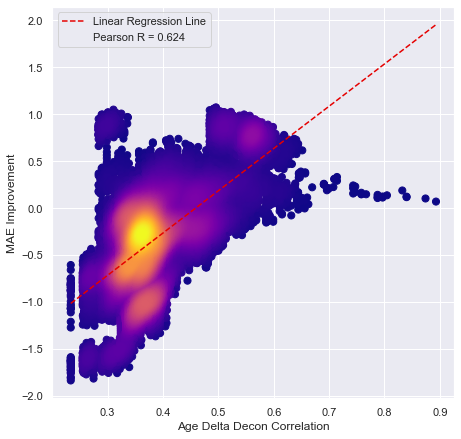

In [31]:
scatter_plot_heatmap(x=pr_df_3.corr_age_delta_decon, y=pr_df_3.mae_improvements, 
                     xlabel='Age Delta Decon Correlation', 
                   ylabel='MAE Improvement', title=None, set_scale=False, 
                   equality_line=False)

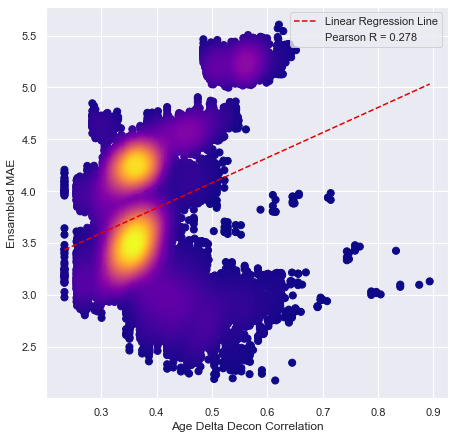

In [30]:
scatter_plot_heatmap(x=pr_df_3.corr_age_delta_decon, y=pr_df_3.ensambled_mae, 
                     xlabel='Age Delta Decon Correlation', 
                   ylabel='Ensambled MAE', title=None, set_scale=False, 
                   equality_line=False)

In [32]:
# pr_df_3[pr_df_3.ensambled_mae <= 2.5].sort_values('ensambled_mae')
pr_df_3[(pr_df_3.ensambled_mae <= 2.3) & (pr_df_3.mae_improvements > 0)].sort_values('ensambled_mae')
# pr_df_3[(pr_df_3.mae_improvements <= -1.75)].sort_values('mae_improvements')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
2,T1_nonlinear T1_linear T2_nonlinear,0.940706,0.614109,2.372138,2.176363,0.195775
205,T1_nonlinear T2_nonlinear tbss_FA,0.909124,0.503920,2.372138,2.190324,0.181814
206,T1_nonlinear T2_nonlinear tbss_ICVF,0.916346,0.537300,2.372138,2.197541,0.174597
213,T1_nonlinear T2_nonlinear tbss_OD,0.904038,0.507411,2.372138,2.232077,0.140061
1690,T1_linear T2_nonlinear tbss_FA,0.909124,0.503920,2.372138,2.235841,0.136297
1691,T1_linear T2_nonlinear tbss_ICVF,0.919330,0.567784,2.372138,2.237120,0.135018
109,T1_nonlinear vbm T2_nonlinear,0.926969,0.590088,2.372138,2.240608,0.131530
197,T1_nonlinear T2_nonlinear tbss_ICVF_s,0.890196,0.458454,2.372138,2.242696,0.129442
196,T1_nonlinear T2_nonlinear tbss_FA_s,0.882704,0.443726,2.372138,2.262724,0.109414
1682,T1_linear T2_nonlinear tbss_ICVF_s,0.886727,0.454898,2.372138,2.263086,0.109052


In [33]:
pr_df_3[(pr_df_3.mae_improvements <= -1.75)].sort_values('mae_improvements')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
6309,T2_nonlinear rsfmri_8 rsfmri_19,0.674581,0.233412,2.372138,4.206978,-1.834840
689,T1_nonlinear rsfmri_8 rsfmri_19,0.686165,0.274584,2.429401,4.244170,-1.814769
6139,T2_nonlinear rsfmri_4 rsfmri_19,0.674581,0.233412,2.372138,4.179642,-1.807504
6699,T2_nonlinear rsfmri_19 rsfmri_24,0.674581,0.233412,2.372138,4.172714,-1.800576
519,T1_nonlinear rsfmri_4 rsfmri_19,0.686165,0.274584,2.429401,4.209241,-1.779840
1079,T1_nonlinear rsfmri_19 rsfmri_24,0.686165,0.274584,2.429401,4.199958,-1.770557
6128,T2_nonlinear rsfmri_4 rsfmri_8,0.692660,0.261285,2.372138,4.142693,-1.770555
6698,T2_nonlinear rsfmri_19 rsfmri_23,0.674581,0.233412,2.372138,4.131532,-1.759394
2174,T1_linear rsfmri_8 rsfmri_19,0.697679,0.317155,2.549765,4.306342,-1.756577
6227,T2_nonlinear rsfmri_6 rsfmri_20,0.687973,0.257296,2.372138,4.128438,-1.756300


In [34]:
pr_df_3[pr_df_3.mae_improvements >= 1].sort_values('ensambled_mae')

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
7231,T2_lesions rsfmri_0 rsfmri_22,0.661799,0.310507,5.509517,4.459231,1.050285
7546,T2_lesions rsfmri_7 rsfmri_22,0.653429,0.300571,5.509517,4.488959,1.020557
7216,T2_lesions rsfmri_0 rsfmri_7,0.653429,0.300571,5.509517,4.489138,1.020379
7210,T2_lesions rsfmri_0 rsfmri_1,0.658124,0.314514,5.509517,4.490025,1.019491
7212,T2_lesions rsfmri_0 rsfmri_3,0.660920,0.324752,5.509517,4.501204,1.008312
7911,T2_lesions rsfmri_17 rsfmri_22,0.661799,0.310507,5.509517,4.504536,1.004981
13525,rsfmri_3 rsfmri_16 rsfmri_23,0.729564,0.495723,6.145504,5.114027,1.031477
11983,rsfmri_2 rsfmri_3 rsfmri_23,0.729654,0.494442,6.145504,5.116227,1.029277
13423,rsfmri_3 rsfmri_13 rsfmri_23,0.737990,0.508273,6.145504,5.121566,1.023938
13107,rsfmri_3 rsfmri_5 rsfmri_23,0.728908,0.495684,6.145504,5.126692,1.018812


In [36]:
pr_df_3[pr_df_3.mae_improvements >= 0]

,ensamble_name,corr_output_age_decon,corr_age_delta_decon,min_mae,ensambled_mae,mae_improvements
1,T1_nonlinear T1_linear vbm,0.936048,0.644710,2.429401,2.346894,0.082507
2,T1_nonlinear T1_linear T2_nonlinear,0.940706,0.614109,2.372138,2.176363,0.195775
4,T1_nonlinear T1_linear swi,0.879298,0.473981,2.429401,2.415807,0.013594
36,T1_nonlinear T1_linear tracts,0.870438,0.430025,2.429401,2.391636,0.037765
37,T1_nonlinear T1_linear tbss_FA_s,0.886437,0.465143,2.429401,2.354939,0.074462
...,...,...,...,...,...,...
29255,tbss_L2 tbss_MO tbss_OD,0.902473,0.600213,3.165894,2.846248,0.319646
29256,tbss_L3 tbss_MD tbss_MO,0.896916,0.582417,3.252166,2.935020,0.317147
29257,tbss_L3 tbss_MD tbss_OD,0.928608,0.696106,3.165894,2.974838,0.191056
29258,tbss_L3 tbss_MO tbss_OD,0.896916,0.582417,3.165894,2.854004,0.311890


----
### NOTES 5:
----

I repeated the previous anslysis, but only this time using ensambles of 3 modalities. These took a few minutes to compute, leading to my commenting them out so not to have long runtimes if the notebook is to be rerun later.

One note - instead of having the PR between 2 modalities, as we are using 3, the x axis is given by the smallest PR between the combination of 3 modalities. 

The obversations previously made remain generally valid:
* the best MAEs are seen when ensambling sMRI and dMRI measures.
* the best improvements are generally seen for combinations of T2 leasions and rsfmri data. 

This could suggest that ensambling these highly correlated classes first could be beneficial.

----

In [ ]:
Ensamble all
Ensamble all pregresivelly based on MAE increase
Ensamble all progresivelly based on correlation to GT
Ensamble all progresivelly based on between correlation (?)
Make some notes on what I am seeing! 

# 3. Ensamble all

3.2650076380723383 0.8708131078665415


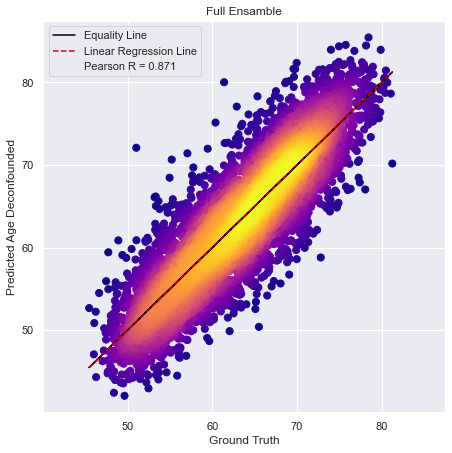

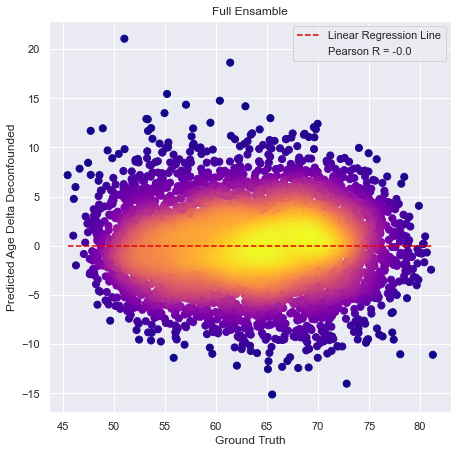

In [8]:
ensambled_ages_deconfounded = None

for idx in range(len(df)):
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df.iloc[idx].dataframe.output_age_decon.to_numpy()
    else:
        ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[idx].dataframe.output_age_decon.to_numpy())

ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(df)

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[0].dataframe.target_age.to_numpy()    
    )

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                        df.iloc[0].dataframe.target_age.to_numpy())[0]

print(ensambled_mae, ensambled_pr)

scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_ages_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Deconfounded', title='Full Ensamble', set_scale=True)

scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title='Full Ensamble', set_scale=False, 
                   equality_line=False)

# 3.1. Ensamble All - Test A/B

In [12]:
from sklearn.model_selection import train_test_split

df_test = {}
df_test['Unnamed: 0'] = df.iloc[0].dataframe['Unnamed: 0'].to_list()
for idx in range(len(df)):
    name = df.iloc[idx].modality
    data = df.iloc[idx].dataframe.mean_output_age.to_list()
    df_test[name] = data
    
df_test = pd.DataFrame.from_dict(df_test)
df_test['target_age'] = df.iloc[0].dataframe.target_age.to_list()

df_testA, df_testB = train_test_split(df_test, test_size=0.5, random_state=1)
subjects_testA = df_testA['Unnamed: 0'].to_list()
subjects_testB = df_testB['Unnamed: 0'].to_list()
df_testA = df_testA.drop(labels='Unnamed: 0', axis=1)
df_testB = df_testB.drop(labels='Unnamed: 0', axis=1)

# df_train = df_testA
# df_test = df_testB

In [13]:
df_testB

,T1_nonlinear,T1_linear,jacobian,vbm,T2_nonlinear,T2_lesions,swi,rsfmri_0,rsfmri_1,rsfmri_2,...,tbss_FA,tbss_ICVF,tbss_ISOVF,tbss_L1,tbss_L2,tbss_L3,tbss_MD,tbss_MO,tbss_OD,target_age
4782,63.245763,60.347539,59.175664,60.535280,60.572191,64.271554,60.995139,61.454180,65.820454,54.018154,...,59.640923,59.256958,60.798890,59.529524,60.710006,61.519483,58.473717,63.440821,60.856472,59.311073
1499,65.723238,64.545638,64.115105,61.995279,61.336338,58.351572,61.548383,63.829018,65.781898,63.909287,...,60.730879,62.307837,59.981651,61.838904,59.056288,59.426216,60.391799,60.675784,61.064435,67.523907
1355,70.625488,72.846277,67.263212,67.866833,67.953740,64.834815,69.404198,67.038805,72.272427,69.569033,...,69.970463,69.134120,70.144314,70.540548,68.802525,70.392927,70.302002,69.416728,68.678743,72.236872
428,66.489107,65.828297,69.445412,70.458772,68.375243,74.661483,67.512283,67.176399,65.978737,64.585167,...,68.711838,68.486243,63.146150,66.291610,65.741838,64.530488,65.988057,69.211123,63.804908,69.261758
4145,52.520869,50.627655,50.201043,55.607993,52.392310,54.855268,51.198625,54.453357,52.335854,53.213187,...,51.796479,53.298255,51.953147,51.934909,52.652825,51.864011,52.028369,53.204612,50.712734,48.488699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4863,68.392203,68.626732,62.527637,69.205427,69.337220,60.014212,67.382435,61.358376,65.911358,65.441105,...,68.193215,68.005068,67.585417,68.064463,68.890253,67.697787,67.649173,66.978093,68.282287,70.577186
4789,73.262425,75.177746,72.687402,73.095372,71.387027,71.550072,68.853650,70.244118,70.091700,75.162663,...,76.573107,74.818037,75.255967,73.523410,75.733007,73.303215,75.431483,75.108463,75.181920,69.101712
883,59.688874,60.022259,64.018817,62.083768,57.404459,61.996371,60.924057,73.446907,68.175377,66.366097,...,64.946223,64.153781,64.620801,66.337545,64.970903,64.048392,66.100290,63.985211,61.135144,57.618169
1688,70.857363,68.741170,71.347395,70.061517,70.100983,65.109477,68.053762,66.053088,64.121276,65.389990,...,65.896517,69.423343,68.763145,69.311439,69.794000,70.722923,68.751759,70.241538,71.175175,73.835046


<class 'numpy.ndarray'>
[61.92988227 63.05145354 69.94318226 ... 65.97760736 67.4108684
 56.46836756]
[ 2.61880921 -4.47245356 -2.29368989 ...  8.35943796 -6.42417726
  0.28149541]
3.076201645560478 0.8832293916192556


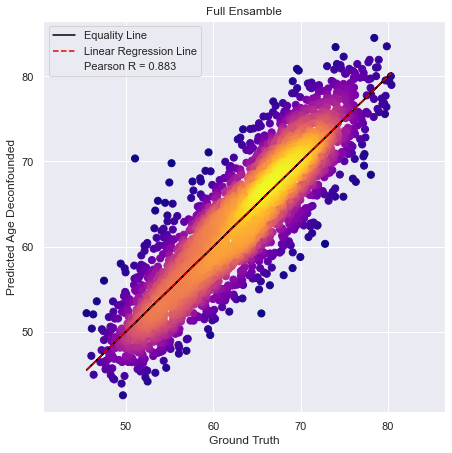

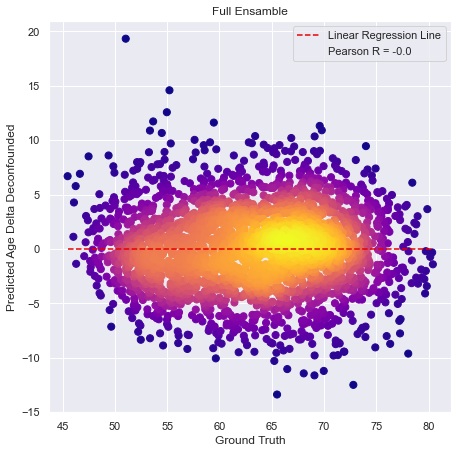

In [17]:
ensambled_ages_deconfounded = None

for column in df_testB.columns[:-1]:
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df_testB[column].to_numpy()
    else:
        ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df_testB[column].to_numpy())

ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(df)

mean_output_age = np.copy(ensambled_ages_deconfounded)
target_age = df_testB['target_age'].values

print(type(target_age))
print(ensambled_ages_deconfounded)

mean_age_delta = np.subtract(
        mean_output_age,
        df_testB['target_age'].to_numpy())

print(mean_age_delta)

ensambled_ages_deconfounded = age_deconfounding(ensambled_ages_deconfounded, df_testB['target_age'].to_numpy())

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df_testB['target_age'].to_numpy())

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                        df_testB['target_age'].to_numpy())[0]

print(ensambled_mae, ensambled_pr)

scatter_plot_heatmap(x=df_testB['target_age'], y=ensambled_ages_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Deconfounded', title='Full Ensamble', set_scale=True)

scatter_plot_heatmap(x=df_testB['target_age'], y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                   ylabel='Predicted Age Delta Deconfounded', title='Full Ensamble', set_scale=False, 
                   equality_line=False)

In [18]:
df_output = pd.DataFrame.from_dict({
    'modality': 'NaiveFull',
    'dataframe': [pd.DataFrame.from_dict({
                'Unnamed: 0': subjects_testB,
                'age_delta_decon': ensambled_deltas_deconfounded,
                'mean_age_delta': mean_age_delta,
                'target_age': target_age,
                'mean_output_age': mean_output_age
                })]
})

output_name = 'female_ensembles_testset.pkl'

if os.path.exists(output_name):
    df_ensambles = pd.read_pickle(output_name)
    if df_output.iloc[0].modality in df_ensambles.modality.to_list():
        pass
    else:
        df_ensambles = pd.concat([df_ensambles, df_output])
        df_ensambles.to_pickle(output_name, protocol = 4)
else:
    df_output.to_pickle(output_name, protocol = 4)
    
df_ensambles = pd.read_pickle(output_name)
df_ensambles.iloc[0].dataframe

,modality,dataframe
0,NaiveFull,Unnamed: 0 age_delta_decon mean_age_de...


In [19]:
df_ensambles.iloc[0].dataframe

,Unnamed: 0,age_delta_decon,mean_age_delta,target_age,mean_output_age
0,25731272,1.740626,2.618809,59.311073,61.929882
1,23327192,-4.645258,-4.472454,67.523907,63.051454
2,21569423,1.867852,-2.293690,72.236872,69.943182
3,25730176,-1.207669,-3.033083,69.261758,66.228675
4,23094690,-1.495163,4.810826,48.488699,53.299524
...,...,...,...,...,...
2506,23930771,-2.942920,-4.606242,70.577186,65.970944
2507,24847070,10.341116,4.118552,69.101712,73.220264
2508,23169754,10.026950,8.359438,57.618169,65.977607
2509,25240989,-3.855258,-6.424177,73.835046,67.410868


----
### NOTES 6:
----

In the following, I did something trivial: ensamble all the modalities, either in one go, or progresivelly based on increasing and decreasing MAE.

The whole ensamble MAE and PR can be see above - they are lower than those of the best performing modalities, but higher than a large part of the other modaltieis.

Below, it can be observed that ensambling the rsfmri modalities generally leads to performance improvements (3.2), while ensambling the better performing modalities generally leads to small improvements followed by a degradation in performance as more modalities are added in (3.1)

----

## 3.1. Ensamble all based on MAE Increase

In [42]:
mae_df = mae_df.sort_values('mae_decon', ascending=True)

In [43]:
mae_df

,modality,mae_decon
4,T2_nonlinear,2.372138
0,T1_nonlinear,2.429401
1,T1_linear,2.549765
3,vbm,2.925686
49,tbss_ICVF,2.951742
48,tbss_FA,2.997317
50,tbss_ISOVF,3.143075
56,tbss_OD,3.165894
52,tbss_L2,3.201913
51,tbss_L1,3.217686


In [44]:
ordered_modalities = mae_df.modality.to_list()
maes_list = []
prs_list = []

df.iloc[modalities.index(subset[0])]

for i in range(2, len(mae_df)+1):
    ensambled_ages_deconfounded = None
    for j in range(i):
        if ensambled_ages_deconfounded is None:
            ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
        else:
            ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())
            
    ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

    ensambled_deltas_deconfounded = np.subtract(
            ensambled_ages_deconfounded,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )

    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    maes_list.append(ensambled_mae)

    ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                            df.iloc[0].dataframe.target_age.to_numpy())[0]
    prs_list.append(ensambled_pr)
    

Text(0, 0.5, 'Ensambled Pearson R')

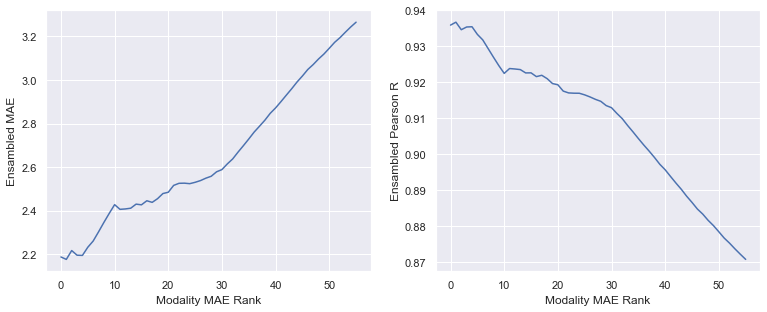

In [45]:
plt.figure(figsize=(12.8, 4.8))
plt.subplot(121)
plt.plot(maes_list)
plt.xlabel('Modality MAE Rank')
plt.ylabel('Ensambled MAE')

plt.subplot(122)
plt.plot(prs_list)
plt.xlabel('Modality MAE Rank')
plt.ylabel('Ensambled Pearson R')

## 3.2. Ensamble based on MSE Decrease

Text(0, 0.5, 'Ensambled Pearson R')

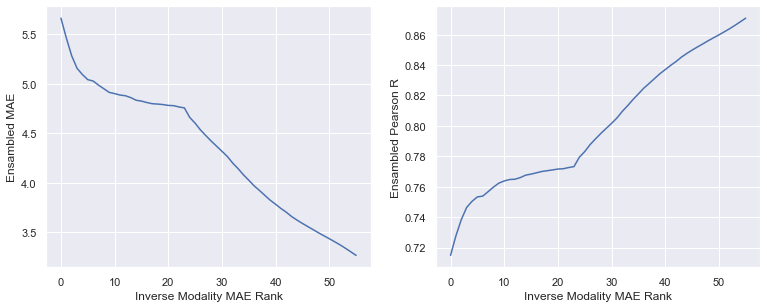

In [46]:
mae_df = mae_df.sort_values('mae_decon', ascending=False)

ordered_modalities = mae_df.modality.to_list()
maes_list = []
prs_list = []

# df.iloc[modalities.index(subset[0])]

for i in range(2, len(mae_df)+1):
    ensambled_ages_deconfounded = None
    for j in range(i):
        if ensambled_ages_deconfounded is None:
            ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
        else:
            ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                            df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())
            
    ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

    ensambled_deltas_deconfounded = np.subtract(
            ensambled_ages_deconfounded,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )

    ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
    maes_list.append(ensambled_mae)

    ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                            df.iloc[0].dataframe.target_age.to_numpy())[0]
    prs_list.append(ensambled_pr)
    
plt.figure(figsize=(12.8, 4.8))
plt.subplot(121)
plt.plot(maes_list)
plt.xlabel('Inverse Modality MAE Rank')
plt.ylabel('Ensambled MAE')

plt.subplot(122)
plt.plot(prs_list)
plt.xlabel('Inverse Modality MAE Rank')
plt.ylabel('Ensambled Pearson R')

In [47]:
maes_list[-1]

3.2650076380723383

In [48]:
mae_df

,modality,mae_decon
26,rsfmri_19,6.677694
13,rsfmri_6,6.532293
15,rsfmri_8,6.450184
21,rsfmri_14,6.415494
27,rsfmri_20,6.328768
17,rsfmri_10,6.292288
31,rsfmri_24,6.283299
11,rsfmri_4,6.267126
30,rsfmri_23,6.260286
12,rsfmri_5,6.247979


----
### NOTES 7:
----

It's starting to become clear that a trivial approach to ensambling isn't necessarily the most appropriate one. The above ***TO DOs*** should be tried.

Simply ansambling based on one arbitrary metric - MAE - does not necessarily capture any biological variability! 

Other things worth trying:
- Use the modalities which show improvements after a 2x ensambling, and test adding a 3rd, 4th etc. layer of ensambling, retaining only those combinations which show a +ve improvement in MAE (ie. a reduction). Print out the combinations at each level (or save them some other way).
- Look at ensambling highly correlated clusters, and use those as a "single" modality if they are showing improvements afterwards.
- Segregate modalities into different classes (sMRI, rsfMRI etc..), and the pick from each of thses classes a modality

Then, move into the next form of naive ensambling - data blending. For this, I will need a new set of datasets, with the training data values. 

My feeling thus far is that the best way of approaching this lies in first looking into the nIDP correlations, identifying modalities which correlate with other, nIDPs than their peers, and then use those for any ensambling experiements, either trivial or using regression. 

----

# 4. Progresivelly Ensamble based on MAE Improvement

In [49]:
improvements_after_2 = pr_df[pr_df.mae_improvements >= 0.0].ensamble_name.to_list()

In [50]:
ensamble_names = []
original_maes = []
new_maes = []

for item in improvements_after_2:
    items = item.split()
    original_ensamble = np.add(df.iloc[modalities.index(items[0])].dataframe.output_age_decon.to_numpy(),
                               df.iloc[modalities.index(items[1])].dataframe.output_age_decon.to_numpy())
    original_ensambled_deltas_deconfounded = np.subtract(
            original_ensamble / 2.0,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )
    original_ensambled_mae = np.abs(original_ensambled_deltas_deconfounded).mean()
    
    remaining_modalities = [modality for modality in modalities if modality not in items]
    for modality in remaining_modalities:
               
        new_ensamble = np.add(original_ensamble,
                               df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy())
        new_ensambled_deltas_deconfounded = np.subtract(
            new_ensamble / 3.0,
            df.iloc[0].dataframe.target_age.to_numpy()    
        )
        new_ensambled_mae = np.abs(new_ensambled_deltas_deconfounded).mean()
        
        if new_ensambled_mae <= original_ensambled_mae:
            
            ensamble_name = item + ' ' + modality
            ensamble_names.append(ensamble_name)
            
            original_maes.append(original_ensambled_mae)
            new_maes.append(new_ensambled_mae)
            
            
prog_df_3 = pd.DataFrame.from_dict({
    'ensamble_name': ensamble_names,
    'original_maes': original_maes,
    'new_maes': new_maes,
})

In [51]:
prog_df_3['mae_improvements'] = prog_df_3['original_maes'] - prog_df_3['new_maes']
prog_df_3.sort_values('mae_improvements')

,ensamble_name,original_maes,new_maes,mae_improvements
435,jacobian tbss_L2_s tbss_ISOVF_s,3.231976,3.231970,0.000006
22701,tbss_FA_s tbss_L1_s tbss_L2_s,3.129840,3.129673,0.000167
25494,tbss_ICVF tbss_MO tbss_OD_s,2.792693,2.792513,0.000179
240,jacobian tfmri_c_2 tfmri_2,3.656166,3.655916,0.000250
2770,swi tracts tfmri_2,3.044641,3.044356,0.000285
...,...,...,...,...
9001,rsfmri_4 rsfmri_19 T1_nonlinear,5.840179,4.209241,1.630938
12851,rsfmri_8 rsfmri_19 T1_nonlinear,5.882061,4.244170,1.637891
19180,rsfmri_19 rsfmri_24 T2_nonlinear,5.829210,4.172714,1.656496
9005,rsfmri_4 rsfmri_19 T2_nonlinear,5.840179,4.179642,1.660536


In [52]:
prog_df_3.sort_values('new_maes')

,ensamble_name,original_maes,new_maes,mae_improvements
0,T1_nonlinear T1_linear T2_nonlinear,2.335299,2.176363,0.158935
5,T1_nonlinear T2_nonlinear T1_linear,2.187456,2.176363,0.011092
27,T1_linear T2_nonlinear T1_nonlinear,2.217590,2.176363,0.041226
1015,T2_nonlinear tbss_FA T1_nonlinear,2.344177,2.190324,0.153852
8,T1_nonlinear tbss_FA T2_nonlinear,2.378261,2.190324,0.187936
...,...,...,...,...
13151,rsfmri_8 rsfmri_24 rsfmri_19,5.734779,5.570311,0.164469
12880,rsfmri_8 rsfmri_19 rsfmri_24,5.882061,5.570311,0.311750
8420,rsfmri_4 rsfmri_8 rsfmri_19,5.769727,5.605591,0.164136
12862,rsfmri_8 rsfmri_19 rsfmri_4,5.882061,5.605591,0.276470


In [53]:
# improvements_after_3 = prog_df_3.ensamble_name.to_list()

# ensamble_names = []
# original_maes = []
# new_maes = []

# for item in improvements_after_3:
#     items = item.split()
#     original_ensamble = np.add(df.iloc[modalities.index(items[0])].dataframe.output_age_decon.to_numpy(),
#                                df.iloc[modalities.index(items[1])].dataframe.output_age_decon.to_numpy(),
#                               df.iloc[modalities.index(items[2])].dataframe.output_age_decon.to_numpy())
#     original_ensambled_deltas_deconfounded = np.subtract(
#             original_ensamble / 3.0,
#             df.iloc[0].dataframe.target_age.to_numpy()    
#         )
#     original_ensambled_mae = np.abs(original_ensambled_deltas_deconfounded).mean()
    
#     remaining_modalities = [modality for modality in modalities if modality not in items]
#     for modality in remaining_modalities:
               
#         new_ensamble = np.add(original_ensamble,
#                                df.iloc[modalities.index(modality)].dataframe.output_age_decon.to_numpy())
#         new_ensambled_deltas_deconfounded = np.subtract(
#             new_ensamble / 4.0,
#             df.iloc[0].dataframe.target_age.to_numpy()    
#         )
#         new_ensambled_mae = np.abs(new_ensambled_deltas_deconfounded).mean()
        
#         if new_ensambled_mae <= original_ensambled_mae:
            
#             ensamble_name = item + ' ' + modality
#             ensamble_names.append(ensamble_name)
            
#             original_maes.append(original_ensambled_mae)
#             new_maes.append(new_ensambled_mae)
            
            
# prog_df_4 = pd.DataFrame.from_dict({
#     'ensamble_name': ensamble_names,
#     'original_maes': original_maes,
#     'new_maes': new_maes,
# })

In [54]:
ndf2 = naive_ensambling(df, custom_modalities=None, max_objects=2, verbose=False)

In [55]:
ndf2

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear T1_linear,Unnamed: 0 target_age output_age_decon...,2.429401,2.335299,0.094102
1,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.187456,0.184682
2,T1_nonlinear tbss_FA,Unnamed: 0 target_age output_age_decon...,2.429401,2.378261,0.051140
3,T1_nonlinear tbss_ICVF,Unnamed: 0 target_age output_age_decon...,2.429401,2.357500,0.071901
4,T1_linear vbm,Unnamed: 0 target_age output_age_decon...,2.549765,2.496324,0.053441
...,...,...,...,...,...
660,tbss_L3 tbss_MO,Unnamed: 0 target_age output_age_decon...,3.267353,2.956021,0.311332
661,tbss_L3 tbss_OD,Unnamed: 0 target_age output_age_decon...,3.165894,2.972614,0.193280
662,tbss_MD tbss_MO,Unnamed: 0 target_age output_age_decon...,3.252166,2.950554,0.301613
663,tbss_MD tbss_OD,Unnamed: 0 target_age output_age_decon...,3.165894,2.962054,0.203840


In [56]:
ndf3 = naive_ensambling(df, custom_modalities=None, min_objects=3, max_objects=3, verbose=False)

In [57]:
ndf3

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
0,T1_nonlinear T1_linear vbm,Unnamed: 0 target_age output_age_decon...,2.429401,2.346894,0.082507
1,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.176363,0.195775
2,T1_nonlinear T1_linear swi,Unnamed: 0 target_age output_age_decon...,2.429401,2.415807,0.013594
3,T1_nonlinear T1_linear tracts,Unnamed: 0 target_age output_age_decon...,2.429401,2.391636,0.037765
4,T1_nonlinear T1_linear tbss_FA_s,Unnamed: 0 target_age output_age_decon...,2.429401,2.354939,0.074462
...,...,...,...,...,...
7696,tbss_L2 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.165894,2.846248,0.319646
7697,tbss_L3 tbss_MD tbss_MO,Unnamed: 0 target_age output_age_decon...,3.252166,2.935020,0.317147
7698,tbss_L3 tbss_MD tbss_OD,Unnamed: 0 target_age output_age_decon...,3.165894,2.974838,0.191056
7699,tbss_L3 tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,3.165894,2.854004,0.311890


In [ ]:
# ndf4 = naive_ensambling(df, custom_modalities=None, min_objects=4, max_objects=4, verbose=False)

In [ ]:
# ndf4

In [ ]:
# ndf4.modality.to_list()[2000:3000]

----
### NOTES 8:
----

By analysing the modalities which seem to improve each other's MAE via ensambling, once can observe a preferece, especially when ensambling up to 4, form modalities which show higher correlations between each other. This can be corroborated with the 2x plot from above!

----

# 5. Ensamble highly correlated clusters

In [59]:
smri_mod = modalities[:7]
rsfmri_mod = modalities[7:32]
tfmri_mod = modalities[32:38]
dmri_mod = modalities[38:]
tbss_s_mod = dmri_mod[1:10]
tbss_mod = dmri_mod[10:]

rsfmri_jac_mod = rsfmri_mod + ['jacobian']
tfmri_jac_mod = tfmri_mod + ['jacobian']

fmri_mod = rsfmri_mod + tfmri_mod
fmri_jac_mod = rsfmri_mod + tfmri_mod + ['jacobian']

tbss_s_mod_tracts = dmri_mod[1:10] + ['tracts']
tbss_mod_tract = dmri_mod[10:] + ['tracts']

mod_list = [smri_mod, rsfmri_mod, tfmri_mod, dmri_mod, tbss_s_mod, tbss_mod, rsfmri_jac_mod, tfmri_jac_mod, 
             fmri_mod, fmri_jac_mod, tbss_s_mod_tracts, tbss_mod_tract]
mod_names = ['smri_mod', 'rsfmri_mod', 'tfmri_mod', 'dmri_mod', 'tbss_s_mod', 'tbss_mod', 'rsfmri_jac_mod', 
             'tfmri_jac_mod', 'fmri_mod', 'fmri_jac_mod', 'tbss_s_mod_tracts', 'tbss_mod_tract']

In [60]:
mae_df = mae_df.sort_values('mae_decon', ascending=True)
mae_df

,modality,mae_decon
4,T2_nonlinear,2.372138
0,T1_nonlinear,2.429401
1,T1_linear,2.549765
3,vbm,2.925686
49,tbss_ICVF,2.951742
48,tbss_FA,2.997317
50,tbss_ISOVF,3.143075
56,tbss_OD,3.165894
52,tbss_L2,3.201913
51,tbss_L1,3.217686


In [61]:
def ensamble_sub_modality_groups(sub_modality_group, mae_df, df, sub_modality_name):

    ordered_modalities = mae_df.modality.to_list()
    ordered_modalities = [modality for modality in ordered_modalities if modality in sub_modality_group]
    print(ordered_modalities)

    maes_list = []
    prs_list = []

    for i in range(2, len(ordered_modalities)+1):
        ensambled_ages_deconfounded = None
        for j in range(i):
            if ensambled_ages_deconfounded is None:
                ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy()
            else:
                ensambled_ages_deconfounded = np.add(ensambled_ages_deconfounded,
                                                df.iloc[modalities.index(ordered_modalities[j])].dataframe.output_age_decon.to_numpy())

        ensambled_ages_deconfounded = ensambled_ages_deconfounded / i

        ensambled_deltas_deconfounded = np.subtract(
                ensambled_ages_deconfounded,
                df.iloc[0].dataframe.target_age.to_numpy()    
            )

        ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()
        maes_list.append(ensambled_mae)

        ensambled_pr = pearsonr(ensambled_ages_deconfounded, 
                                df.iloc[0].dataframe.target_age.to_numpy())[0]
        prs_list.append(ensambled_pr)

    plt.figure(figsize=(12.8, 4.8))
    plt.subplot(121)
    plt.plot(maes_list)
    plt.title(sub_modality_name)
    plt.plot([],[],' ',label='MIN MAE=' + str(min(maes_list)))
    plt.plot([],[],' ',label='MIN LOC=' + str(1 + np.argmin(np.array(maes_list))))
    plt.legend()
    plt.xlabel('No of Modalitities Ensambled with MAE Rank')
    plt.ylabel('Ensambled MAE')
    plt.show()
    
    print('-------')

['rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18', 'rsfmri_21', 'rsfmri_7', 'rsfmri_1', 'rsfmri_9', 'rsfmri_3', 'rsfmri_13', 'rsfmri_12', 'rsfmri_15', 'rsfmri_2', 'rsfmri_16', 'rsfmri_5', 'rsfmri_23', 'rsfmri_4', 'rsfmri_24', 'rsfmri_10', 'rsfmri_20', 'rsfmri_14', 'rsfmri_8', 'rsfmri_6', 'rsfmri_19']


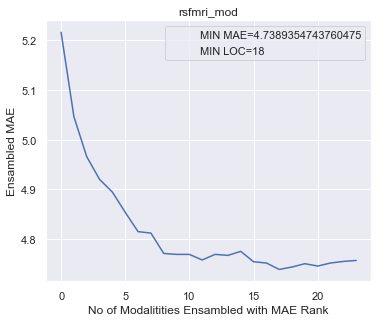

-------


In [62]:
ensamble_sub_modality_groups(sub_modality_group=rsfmri_mod, mae_df=mae_df, df=df, sub_modality_name='rsfmri_mod')

['T2_nonlinear', 'T1_nonlinear', 'T1_linear', 'vbm', 'swi', 'jacobian', 'T2_lesions']


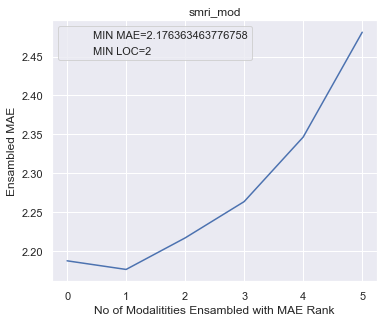

-------
['rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18', 'rsfmri_21', 'rsfmri_7', 'rsfmri_1', 'rsfmri_9', 'rsfmri_3', 'rsfmri_13', 'rsfmri_12', 'rsfmri_15', 'rsfmri_2', 'rsfmri_16', 'rsfmri_5', 'rsfmri_23', 'rsfmri_4', 'rsfmri_24', 'rsfmri_10', 'rsfmri_20', 'rsfmri_14', 'rsfmri_8', 'rsfmri_6', 'rsfmri_19']


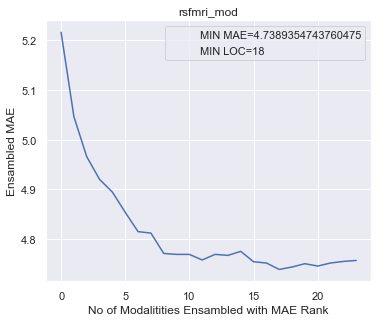

-------
['tfmri_1', 'tfmri_c_1', 'tfmri_c_2', 'tfmri_c_5', 'tfmri_2', 'tfmri_5']


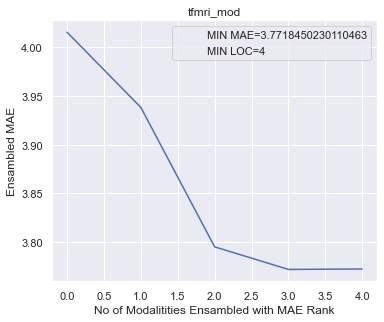

-------
['tbss_ICVF', 'tbss_FA', 'tbss_ISOVF', 'tbss_OD', 'tbss_L2', 'tbss_L1', 'tbss_MD', 'tbss_L3', 'tbss_ICVF_s', 'tbss_MO', 'tbss_FA_s', 'tbss_L1_s', 'tracts', 'tbss_L2_s', 'tbss_MD_s', 'tbss_L3_s', 'tbss_OD_s', 'tbss_ISOVF_s', 'tbss_MO_s']


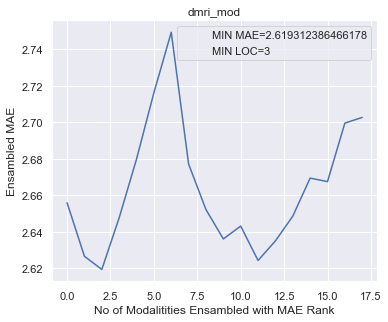

-------
['tbss_ICVF_s', 'tbss_FA_s', 'tbss_L1_s', 'tbss_L2_s', 'tbss_MD_s', 'tbss_L3_s', 'tbss_OD_s', 'tbss_ISOVF_s', 'tbss_MO_s']


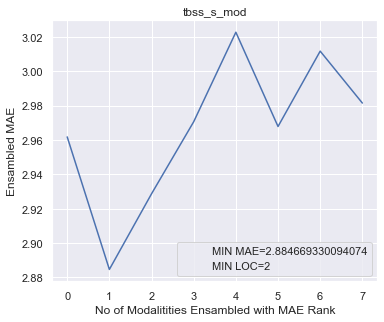

-------
['tbss_ICVF', 'tbss_FA', 'tbss_ISOVF', 'tbss_OD', 'tbss_L2', 'tbss_L1', 'tbss_MD', 'tbss_L3', 'tbss_MO']


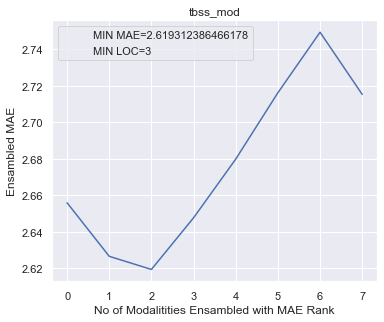

-------
['jacobian', 'rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18', 'rsfmri_21', 'rsfmri_7', 'rsfmri_1', 'rsfmri_9', 'rsfmri_3', 'rsfmri_13', 'rsfmri_12', 'rsfmri_15', 'rsfmri_2', 'rsfmri_16', 'rsfmri_5', 'rsfmri_23', 'rsfmri_4', 'rsfmri_24', 'rsfmri_10', 'rsfmri_20', 'rsfmri_14', 'rsfmri_8', 'rsfmri_6', 'rsfmri_19']


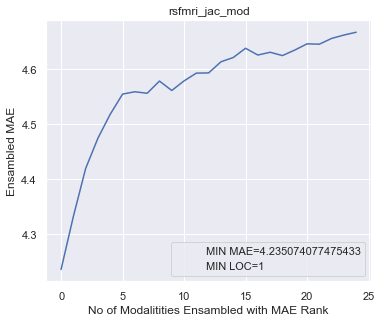

-------
['jacobian', 'tfmri_1', 'tfmri_c_1', 'tfmri_c_2', 'tfmri_c_5', 'tfmri_2', 'tfmri_5']


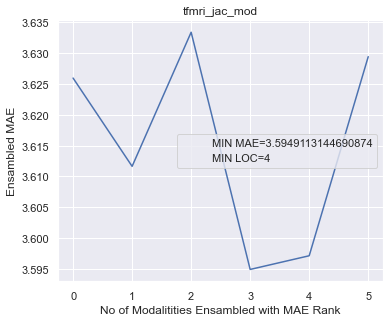

-------
['tfmri_1', 'tfmri_c_1', 'tfmri_c_2', 'tfmri_c_5', 'tfmri_2', 'tfmri_5', 'rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18', 'rsfmri_21', 'rsfmri_7', 'rsfmri_1', 'rsfmri_9', 'rsfmri_3', 'rsfmri_13', 'rsfmri_12', 'rsfmri_15', 'rsfmri_2', 'rsfmri_16', 'rsfmri_5', 'rsfmri_23', 'rsfmri_4', 'rsfmri_24', 'rsfmri_10', 'rsfmri_20', 'rsfmri_14', 'rsfmri_8', 'rsfmri_6', 'rsfmri_19']


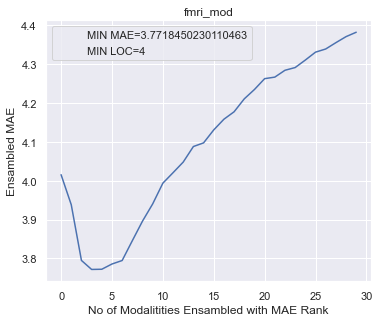

-------
['jacobian', 'tfmri_1', 'tfmri_c_1', 'tfmri_c_2', 'tfmri_c_5', 'tfmri_2', 'tfmri_5', 'rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18', 'rsfmri_21', 'rsfmri_7', 'rsfmri_1', 'rsfmri_9', 'rsfmri_3', 'rsfmri_13', 'rsfmri_12', 'rsfmri_15', 'rsfmri_2', 'rsfmri_16', 'rsfmri_5', 'rsfmri_23', 'rsfmri_4', 'rsfmri_24', 'rsfmri_10', 'rsfmri_20', 'rsfmri_14', 'rsfmri_8', 'rsfmri_6', 'rsfmri_19']


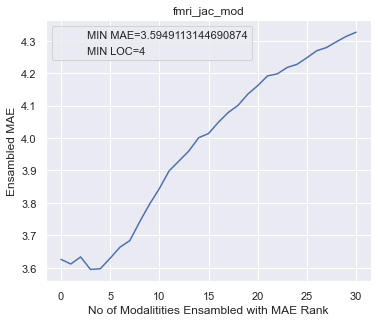

-------
['tbss_ICVF_s', 'tbss_FA_s', 'tbss_L1_s', 'tracts', 'tbss_L2_s', 'tbss_MD_s', 'tbss_L3_s', 'tbss_OD_s', 'tbss_ISOVF_s', 'tbss_MO_s']


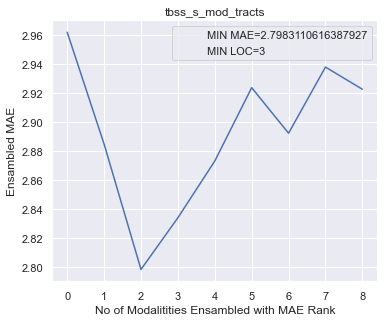

-------
['tbss_ICVF', 'tbss_FA', 'tbss_ISOVF', 'tbss_OD', 'tbss_L2', 'tbss_L1', 'tbss_MD', 'tbss_L3', 'tbss_MO', 'tracts']


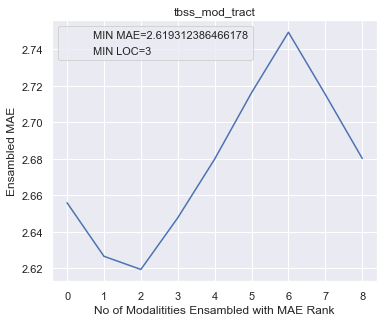

-------


In [63]:
for idx, sub_mod in enumerate(mod_list):
    ensamble_sub_modality_groups(sub_modality_group=sub_mod, mae_df=mae_df, df=df, sub_modality_name=mod_names[idx])
    
    

----
### NOTES 9:
----

Looking at groups of highly correlated data, purely ensambling all or part of them seems to be beneficial for the following:
- rsfmri
- tfmri
- parts of the tbss, tbss skel, and dmri modals (part of them, not complete!)


From below, we can observe a few other things:
- for sMRI: the freatst improvements seem to occur when ensambling "traditional" modalities (T1, T2) as well as the jacobian and swi
- for tfMRI, the trend observed above is confirmed: the more modalities ensambled, generally the better. Possibly, this might be the case for rsfmri, yet I did not test this because of the compuattional overhead.
    - adding the Jacobian in the mix can also lead to some improvements
- for tbss and tbss-s, the things are less clear cut.
    - adding in the tracts can lead to some improvements for tbss and tbss_S

***To try later: Look at isolating the best MAE and best-MAE improvement groups for each subclass, and then ensamble between these. WAIT TO CONFIRM WITH SUPERVISORS THOUGH!***

----

In [64]:
x = naive_ensambling(df, custom_modalities=smri_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False).head()

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
5,jacobian swi,Unnamed: 0 target_age output_age_decon...,3.626025,3.283117,0.342908
15,jacobian T2_lesions swi,Unnamed: 0 target_age output_age_decon...,3.626025,3.386478,0.239548
8,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.176363,0.195775
1,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.187456,0.184682
17,T1_nonlinear T1_linear vbm T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.216900,0.155238


In [65]:
x.sort_values('ensambled_mae').head()

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
8,T1_nonlinear T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.176363,0.195775
1,T1_nonlinear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.187456,0.184682
17,T1_nonlinear T1_linear vbm T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.216900,0.155238
3,T1_linear T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.217590,0.154548
10,T1_nonlinear vbm T2_nonlinear,Unnamed: 0 target_age output_age_decon...,2.372138,2.240608,0.131530


In [66]:
x = naive_ensambling(df, custom_modalities=tfmri_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
30,tfmri_2 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.345477,3.858855,0.486622
39,tfmri_1 tfmri_2 tfmri_c_1 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.249454,3.764204,0.485250
53,tfmri_1 tfmri_2 tfmri_c_1 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.249454,3.771845,0.477609
56,tfmri_1 tfmri_2 tfmri_5 tfmri_c_1 tfmri_c_2 tf...,Unnamed: 0 target_age output_age_decon...,4.249454,3.772327,0.477127
51,tfmri_1 tfmri_2 tfmri_5 tfmri_c_1 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.249454,3.777929,0.471525
47,tfmri_2 tfmri_5 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.345477,3.875476,0.470001
29,tfmri_2 tfmri_c_1 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.274617,3.806294,0.468323
40,tfmri_1 tfmri_2 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.249454,3.782568,0.466886
8,tfmri_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.389891,3.928857,0.461034
48,tfmri_2 tfmri_c_1 tfmri_c_2 tfmri_c_5,Unnamed: 0 target_age output_age_decon...,4.274617,3.816540,0.458077


In [67]:
x = naive_ensambling(df, custom_modalities=tfmri_jac_mod, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
99,tfmri_1 tfmri_2 tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.010300,3.569044,0.441256
75,tfmri_1 tfmri_c_2 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.010300,3.570809,0.439491
84,tfmri_2 tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.010300,3.571448,0.438851
74,tfmri_1 tfmri_c_1 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.010300,3.572721,0.437579
65,tfmri_1 tfmri_2 tfmri_c_5 jacobian,Unnamed: 0 target_age output_age_decon...,4.010300,3.573323,0.436977
...,...,...,...,...,...
12,tfmri_5 tfmri_c_2,Unnamed: 0 target_age output_age_decon...,4.345477,4.069975,0.275502
6,tfmri_2 tfmri_5,Unnamed: 0 target_age output_age_decon...,4.408434,4.093679,0.314754
8,tfmri_2 tfmri_c_2,Unnamed: 0 target_age output_age_decon...,4.345477,4.105933,0.239543
15,tfmri_c_1 tfmri_c_2,Unnamed: 0 target_age output_age_decon...,4.274617,4.110689,0.163928


In [68]:
x = naive_ensambling(df, custom_modalities=tbss_s_mod, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
245,tbss_L3_s tbss_MD_s tbss_MO_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.628106,3.118279,0.509828
244,tbss_L2_s tbss_MD_s tbss_MO_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.615066,3.111367,0.503699
371,tbss_L2_s tbss_L3_s tbss_MD_s tbss_MO_s tbss_OD_s,Unnamed: 0 target_age output_age_decon...,3.615066,3.118588,0.496478
19,tbss_ISOVF_s tbss_MO_s,Unnamed: 0 target_age output_age_decon...,3.956335,3.473497,0.482838
365,tbss_ISOVF_s tbss_L3_s tbss_MD_s tbss_MO_s tbs...,Unnamed: 0 target_age output_age_decon...,3.628106,3.149050,0.479057
...,...,...,...,...,...
8,tbss_ICVF_s tbss_ISOVF_s,Unnamed: 0 target_age output_age_decon...,3.298161,3.201881,0.096280
18,tbss_ISOVF_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.628106,3.556836,0.071270
17,tbss_ISOVF_s tbss_L3_s,Unnamed: 0 target_age output_age_decon...,3.643641,3.581631,0.062010
16,tbss_ISOVF_s tbss_L2_s,Unnamed: 0 target_age output_age_decon...,3.615066,3.554906,0.060160


In [69]:
x = naive_ensambling(df, custom_modalities=tbss_mod, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
260,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO tbss_OD,Unnamed: 0 target_age output_age_decon...,2.951742,2.618624,0.333118
125,tbss_FA tbss_ICVF tbss_ISOVF tbss_OD,Unnamed: 0 target_age output_age_decon...,2.951742,2.619312,0.332429
124,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO,Unnamed: 0 target_age output_age_decon...,2.951742,2.621200,0.330542
36,tbss_FA tbss_ICVF tbss_ISOVF,Unnamed: 0 target_age output_age_decon...,2.951742,2.626506,0.325235
42,tbss_FA tbss_ICVF tbss_OD,Unnamed: 0 target_age output_age_decon...,2.951742,2.627721,0.324021
...,...,...,...,...,...
110,tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.201913,3.131173,0.070740
23,tbss_L1 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.217686,3.136151,0.081536
26,tbss_L2 tbss_L3,Unnamed: 0 target_age output_age_decon...,3.201913,3.146327,0.055586
27,tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.201913,3.152538,0.049375


In [70]:
x = naive_ensambling(df, custom_modalities=tbss_mod_tract, max_objects=None, verbose=False)
# x.sort_values('mae_improvement', ascending=False)
x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
395,tbss_FA tbss_ICVF tbss_ISOVF tbss_OD tracts,Unnamed: 0 target_age output_age_decon...,2.951742,2.605307,0.346435
661,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO tbss_OD t...,Unnamed: 0 target_age output_age_decon...,2.951742,2.608511,0.343231
871,tbss_FA tbss_ICVF tbss_ISOVF tbss_MD tbss_MO t...,Unnamed: 0 target_age output_age_decon...,2.951742,2.615404,0.336338
394,tbss_FA tbss_ICVF tbss_ISOVF tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,2.951742,2.615607,0.336135
866,tbss_FA tbss_ICVF tbss_ISOVF tbss_L2 tbss_MO t...,Unnamed: 0 target_age output_age_decon...,2.951742,2.616568,0.335174
...,...,...,...,...,...
145,tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.201913,3.131173,0.070740
26,tbss_L1 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.217686,3.136151,0.081536
30,tbss_L2 tbss_L3,Unnamed: 0 target_age output_age_decon...,3.201913,3.146327,0.055586
31,tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.201913,3.152538,0.049375


In [71]:
x.sort_values('mae_improvement', ascending=False)

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
371,tbss_L3 tbss_MD tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.252166,2.833723,0.418443
354,tbss_L1 tbss_L3 tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.217686,2.817018,0.400668
159,tbss_L3 tbss_MO tracts,Unnamed: 0 target_age output_age_decon...,3.267353,2.868653,0.398700
605,tbss_ISOVF tbss_MD tbss_MO tbss_OD tracts,Unnamed: 0 target_age output_age_decon...,3.143075,2.748799,0.394276
600,tbss_ISOVF tbss_L2 tbss_MO tbss_OD tracts,Unnamed: 0 target_age output_age_decon...,3.143075,2.748864,0.394212
...,...,...,...,...,...
8,tbss_FA tracts,Unnamed: 0 target_age output_age_decon...,2.997317,2.936872,0.060445
30,tbss_L2 tbss_L3,Unnamed: 0 target_age output_age_decon...,3.201913,3.146327,0.055586
285,tbss_ICVF tbss_L2 tbss_L3 tbss_MD,Unnamed: 0 target_age output_age_decon...,2.951742,2.902316,0.049425
31,tbss_L2 tbss_MD,Unnamed: 0 target_age output_age_decon...,3.201913,3.152538,0.049375


In [72]:
x = naive_ensambling(df, custom_modalities=tbss_s_mod_tracts, max_objects=None, verbose=False)
x.sort_values('mae_improvement', ascending=False)
# x.sort_values('ensambled_mae')

,modality,dataframe,min_single_mae,ensambled_mae,mae_improvement
625,tbss_L2_s tbss_MD_s tbss_MO_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.613669,2.984123,0.629546
368,tbss_L2_s tbss_MD_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.613669,2.993847,0.619822
626,tbss_L3_s tbss_MD_s tbss_MO_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.613669,2.994838,0.618831
163,tbss_MD_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.613669,2.995248,0.618421
374,tbss_MD_s tbss_MO_s tbss_OD_s tracts,Unnamed: 0 target_age output_age_decon...,3.613669,3.001173,0.612497
...,...,...,...,...,...
9,tbss_ICVF_s tbss_ISOVF_s,Unnamed: 0 target_age output_age_decon...,3.298161,3.201881,0.096280
20,tbss_ISOVF_s tbss_MD_s,Unnamed: 0 target_age output_age_decon...,3.628106,3.556836,0.071270
19,tbss_ISOVF_s tbss_L3_s,Unnamed: 0 target_age output_age_decon...,3.643641,3.581631,0.062010
18,tbss_ISOVF_s tbss_L2_s,Unnamed: 0 target_age output_age_decon...,3.615066,3.554906,0.060160


In [73]:
ordered_modalities= ['rsfmri_0', 'rsfmri_22', 'rsfmri_11', 'rsfmri_17', 'rsfmri_18']

maes_list = []


ensambled_ages_deconfounded = None
for i in range(len(ordered_modalities)):
    
    if ensambled_ages_deconfounded is None:
        ensambled_ages_deconfounded = df.iloc[modalities.index(ordered_modalities[i])].dataframe.output_age_decon.to_numpy()
    else:
        ensambled_ages_deconfounded = ensambled_ages_deconfounded + df.iloc[modalities.index(ordered_modalities[i])].dataframe.output_age_decon.to_numpy()
        
ensambled_ages_deconfounded = ensambled_ages_deconfounded / len(ordered_modalities)

ensambled_deltas_deconfounded = np.subtract(
        ensambled_ages_deconfounded,
        df.iloc[0].dataframe.target_age.to_numpy()    
    )

ensambled_mae = np.abs(ensambled_deltas_deconfounded).mean()

print(ensambled_mae)

4.9201722604585


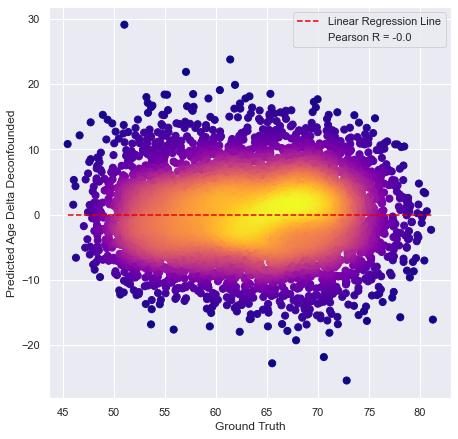

In [74]:
scatter_plot_heatmap(x=df.iloc[0].dataframe.target_age, y=ensambled_deltas_deconfounded, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=None, set_scale=False, 
                               equality_line=False)

In [75]:
fig = scatter_plot_heatmap(x=x.dataframe.target_age, y=x.dataframe.age_delta_decon, xlabel='Ground Truth', 
                               ylabel='Predicted Age Delta Deconfounded', title=name_ens, set_scale=False, 
                               equality_line=False)

AttributeError: 'Series' object has no attribute 'target_age'